# Portuguese Bank Marketing Campaign Prediction

## Introduction

In the banking sector, direct marketing campaigns play a crucial role in engaging potential clients and promoting financial products. This project focuses on analyzing data collected from a Portuguese banking institution between May 2008 and November 2010. The primary goal is to predict whether a client will subscribe to a term deposit product based on various features, including personal details, contact history, and macroeconomic indicators.

### The objectives of this project are as follows:

- To perform comprehensive Exploratory Data Analysis (EDA) to uncover patterns and insights.

- To preprocess and clean the dataset for building robust machine learning models.

- To develop predictive models that can classify clients based on their likelihood to subscribe to a term deposit.

- To evaluate and compare multiple models and determine the best-performing one.

- To generate strategic suggestions to help the bank's marketing team improve campaign effectiveness.

- By the end of this project, we aim to empower the marketing team with data-driven insights that enable smarter client targeting, ultimately increasing campaign efficiency and subscription rates.

In [181]:
import pandas as pd        # For data manipulation and analysis (reading CSV, filtering, etc.)
import numpy as np         # For numerical operations and arrays
import matplotlib.pyplot as plt  # For basic plotting and visualization
import seaborn as sns      # For advanced and prettier visualizations (built on top of matplotlib)

## load The dataset

In [184]:
# Read the dataset with the correct separator
df = pd.read_csv("bank-additional-full.csv", sep=';')

# Display the first few rows in a tabular format
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Print Total Record

In [187]:
print(f"Total Number of records : {len(df.index)}")

Total Number of records : 41188


# Identifying Null Values

In [190]:
print(f"Null Values\n{df.isnull().sum()}\n")

Null Values
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64



## Identifying Null Values in each Column

In [193]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Count how many times 'unknown' appears in that column
    unknown_count = df[col][df[col] == 'unknown'].count()
    
    # Print the column name and the count
    print(f"{col} {unknown_count}")

age 0
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [197]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Categorical Data Summary

In [200]:
var=df.describe(include="O") #Using include='O' tells pandas Only describe columns containing text/categorical data.
print(f"{"*"*10} Categorical Data Summary {"*"*10}\n {var}")

********** Categorical Data Summary **********
            job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


In [202]:
#include=None	Default: describes only numeric columns,
#include='all'  Describes all columns (mixed dtypes).
#Key Terms Reference
#Output	Meaning	Example (from your output)

#count	Total non-null entries	41188 (all rows populated)
#unique	Number of distinct categories Eg(≠ 0 unless all values are identical)	12 (for "job" column)
#top	Most common category	EG("admin." (most frequent job))
#freq	Eg(Occurrences of the top category	10422 (admin. appears 10k+ times))

# Print columns

In [205]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Columns with Less than 30 Unique Values and Their Unique Entries
- ***If that column has less than 30 unique values, then print the column name and those unique values***

In [208]:
for i in df:
    if (len(df[i].unique())<30):
        print("*"*150)
        print(f"column name:{df[i].name}")
        print(f" Unique Values:{df[i].unique()}")

******************************************************************************************************************************************************
column name:job
 Unique Values:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
******************************************************************************************************************************************************
column name:marital
 Unique Values:['married' 'single' 'divorced' 'unknown']
******************************************************************************************************************************************************
column name:education
 Unique Values:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
*****************************************************************************************************************************************

# Rename the columns in dataset

In [211]:
df.rename({'emp.var.rate': 'emp_var_rate'}, axis=1, inplace=True)
df.rename({'cons.price.idx': 'price_idx'}, axis=1, inplace=True)
df.rename({'cons.conf.idx': 'conf_idx'}, axis=1, inplace=True)
df.rename({'nr.employed': 'nr_employed'}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  emp_var_rate  41188 non-null  float64
 16  price_idx     41188 non-null  float64
 17  conf_idx      41188 non-null  float64
 18  euribor3m     41188 non-nu

## EDA (Univariate Analysis)

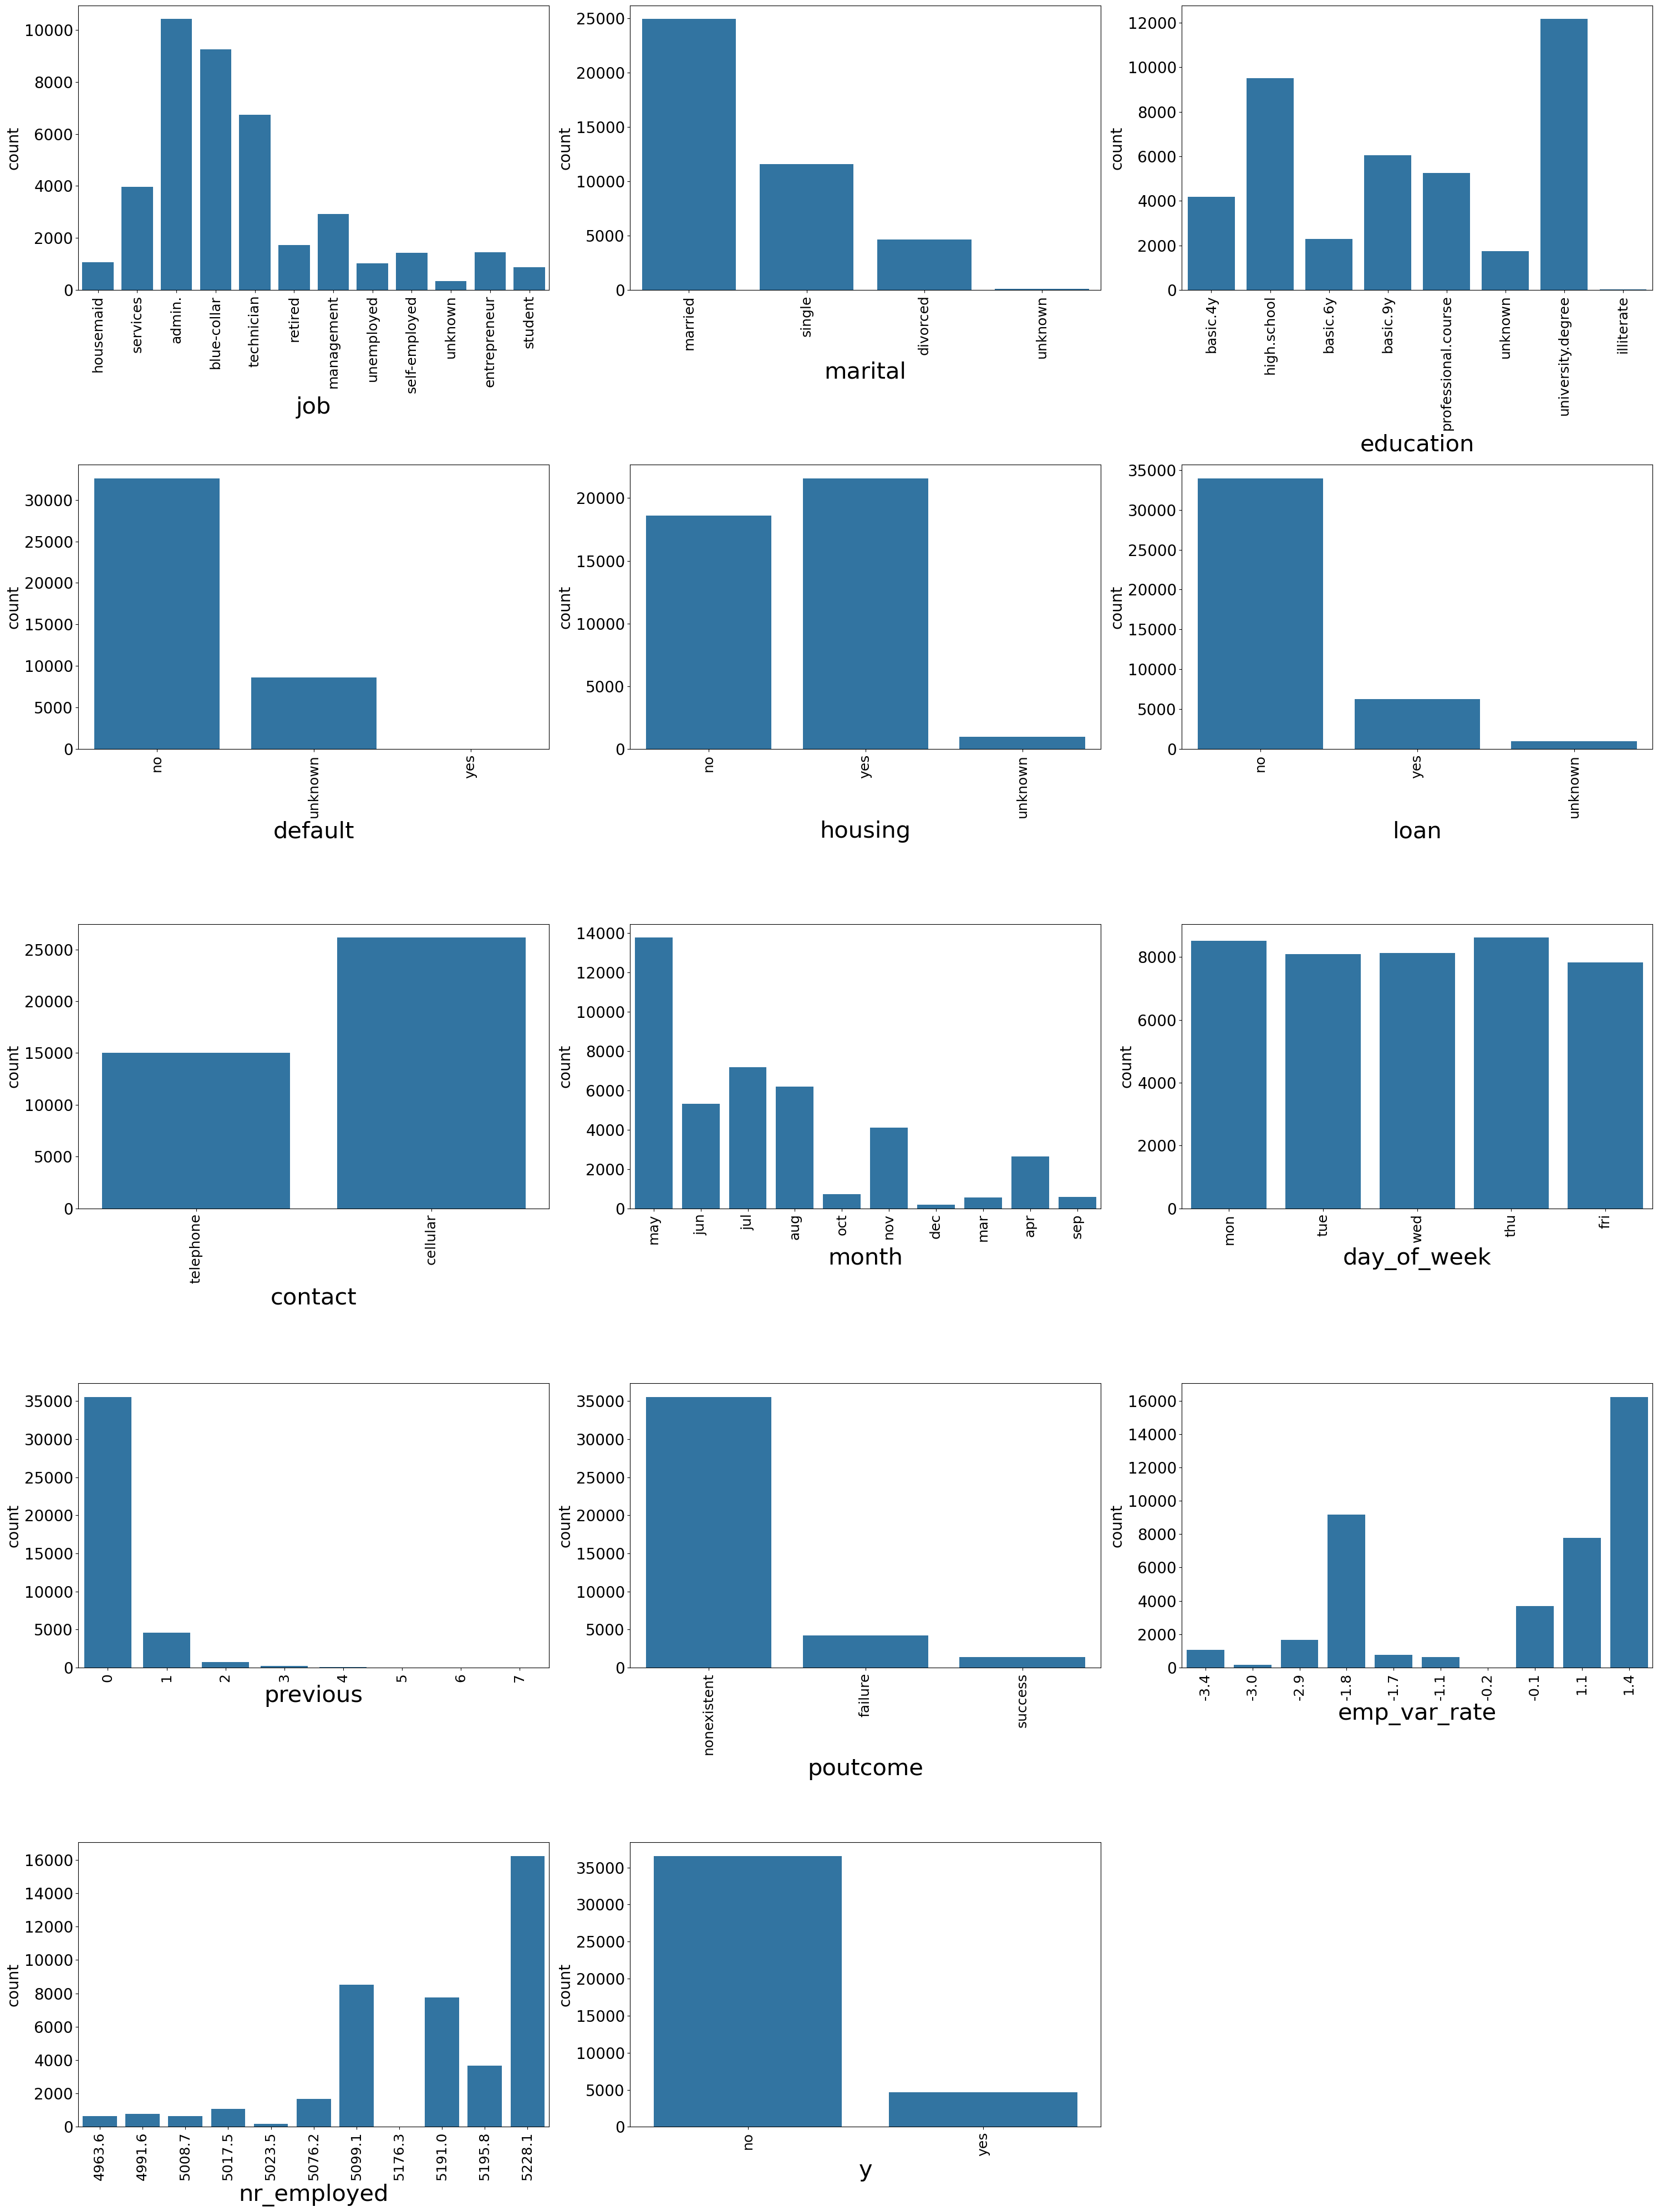

In [214]:
plt.figure(figsize=(30,40))
plotnumber = 1
for i in df:
    if len(df[i].unique()) < 20:
        plt.subplot(5,3,plotnumber)
        plt.xticks(rotation = 90)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=20)
        plt.xlabel(i,fontsize=30)
        plt.ylabel('count',fontsize=20)
        sns.countplot(x = df[i])
        plotnumber += 1

plt.tight_layout()

## Insights

**1** . ***Job***: The highest number of employees are from the **Admin** category and followed by **Blue color**& **technician** roles Fewer employees belong to the *house maid*, *unemployed* , and *students*, *unknown job categories.* 

**2** . ***Marital status***: The majority of people are ***Married*** & and the number of  **Singles**individuals is about ***half*** of that.The **Divorced** and **Unknown** **categories** have significantly fewer entries.

**3** . ***Education***: The majority of people done ***university degree*** and ***high school*** and moderate peoples are ***Basic9y*** & ***Basic4y*** and ***professional course*** and the ratios of ***illiterate Peoples*** are very few.

### Understanding the default Column
- ***Default***:The default column shows whether a customer has ever failed to repay a loan in the past.
- ### 📌 Meaning of the `default` Column

| Value   | Meaning                                                                 |
|---------|-------------------------------------------------------------------------|
| yes     | The customer defaulted before (did not repay a past loan).              |
| no      | The customer did not default (repaid properly or never took a loan).    |
| unknown | The bank does not know the customer's default status.                   |


**4** . ***Default***: ***"no"*** The majority of the people are repaid properly or never took a loan, and there are fewer ***"unknown"*** which is The bank does not know the customer's default status.

**5** . ***Housing***: Most customer have a housing loan **Yes**, but a slightly smaller portion have it marked as **No**. and very portion don't have a **unknown** housing loan status.

**6** . ***Loan*** : Most customer don't have a personal loan **No**, with only a small portion having a personal loan as **Yes**, and very less portion have a **unknown** personal loan status.

##### unknown : The bank does not know if the customer has a personal loan or not. 

**7** .  **`contact`**: Most of the clients were contacted via **cellular**, while a smaller portion were contacted through **telephone**.

**8** . ***Month***: In **May**, the number of calls was at its highest.  
- In **July**, the number of calls also increased, though it was about **half of May's scale**.  
- In **August**, the calls again increased, but slightly **less than in July**.  
- There were very few calls in **September**, **October**, and **December**.

**9** . ***Day of week*** : Fairly evenly distributed across all days of the week.

**10** . ***Previous*** : Most Customers have had no previous contact with the bank **No**, with only a small portion had one or two previous contacts with the bank.

### 📌 `poutcome` - Outcome of the Previous Marketing Campaign

| Value          | Meaning                                                         |
|----------------|-----------------------------------------------------------------|
| success        | The client subscribed to a term deposit in the previous campaign. |
| failure        | The client did not subscribe in the previous campaign.          |
| non-existence  | The client was not contacted in any previous campaign.          |

**11** . ***poutcome*** : The majority of clients fall under the **`non-existence`** category, with only a few having a previous outcome of **`failure`** or **`success`**.


### **`emp_var_rate`**: Employment variation rate (job market change compared to last quarter).

- Positive value → Job market is improving → People feel safe → May invest.
- Negative value → Job market is worse → People feel insecure → Less likely to invest.

Important for the model to understand the economic background of the client.


**12** . ***emp_var_rate*** :            **emp.var.rate** vs **Count of Clients**

- Most calls were made when the employment rate was **positive** (`1.4`, `1.1`) — good job market.
- Surprisingly, many clients were also contacted at `-1.8`, even though it was a **worse job market**.
- Very few calls were made at extreme negative rates like `-3.4` or `-3.0`.

🔍 This shows the bank **mostly contacted people** when the **job market was good**, but also did some calling when it was not so good.

**13** . ***nr_employed*** : **nr_employed** vs **Client Count**

- `nr.employed` shows how many people had jobs during the marketing period.
- When the employment was **highest** (5228.1), **most clients** were contacted.
- Very few clients were contacted during **low employment** (below 5020).

📌 This tells us: 
The bank **preferred contacting people** when the job market was **strong**, assuming they might be **more willing to invest** in a term deposit.

**14** . ***y***: Target Column Analysis: `y`

- This column tells whether the client subscribed to a term deposit.
- `no` = Did not subscribe (~37,000 clients)
- `yes` = Subscribed (~5,000 clients)

📌 Insight:
- The dataset is **imbalanced**, meaning most people said "no".
- This will affect model performance – we need to consider techniques like **resampling**, **SMOTE**, or use **metrics like F1-score** instead of just accuracy.



## And we are tring to find How many customers did we try to call X number of times during the current campaign?

<Axes: xlabel='campaign', ylabel='count'>

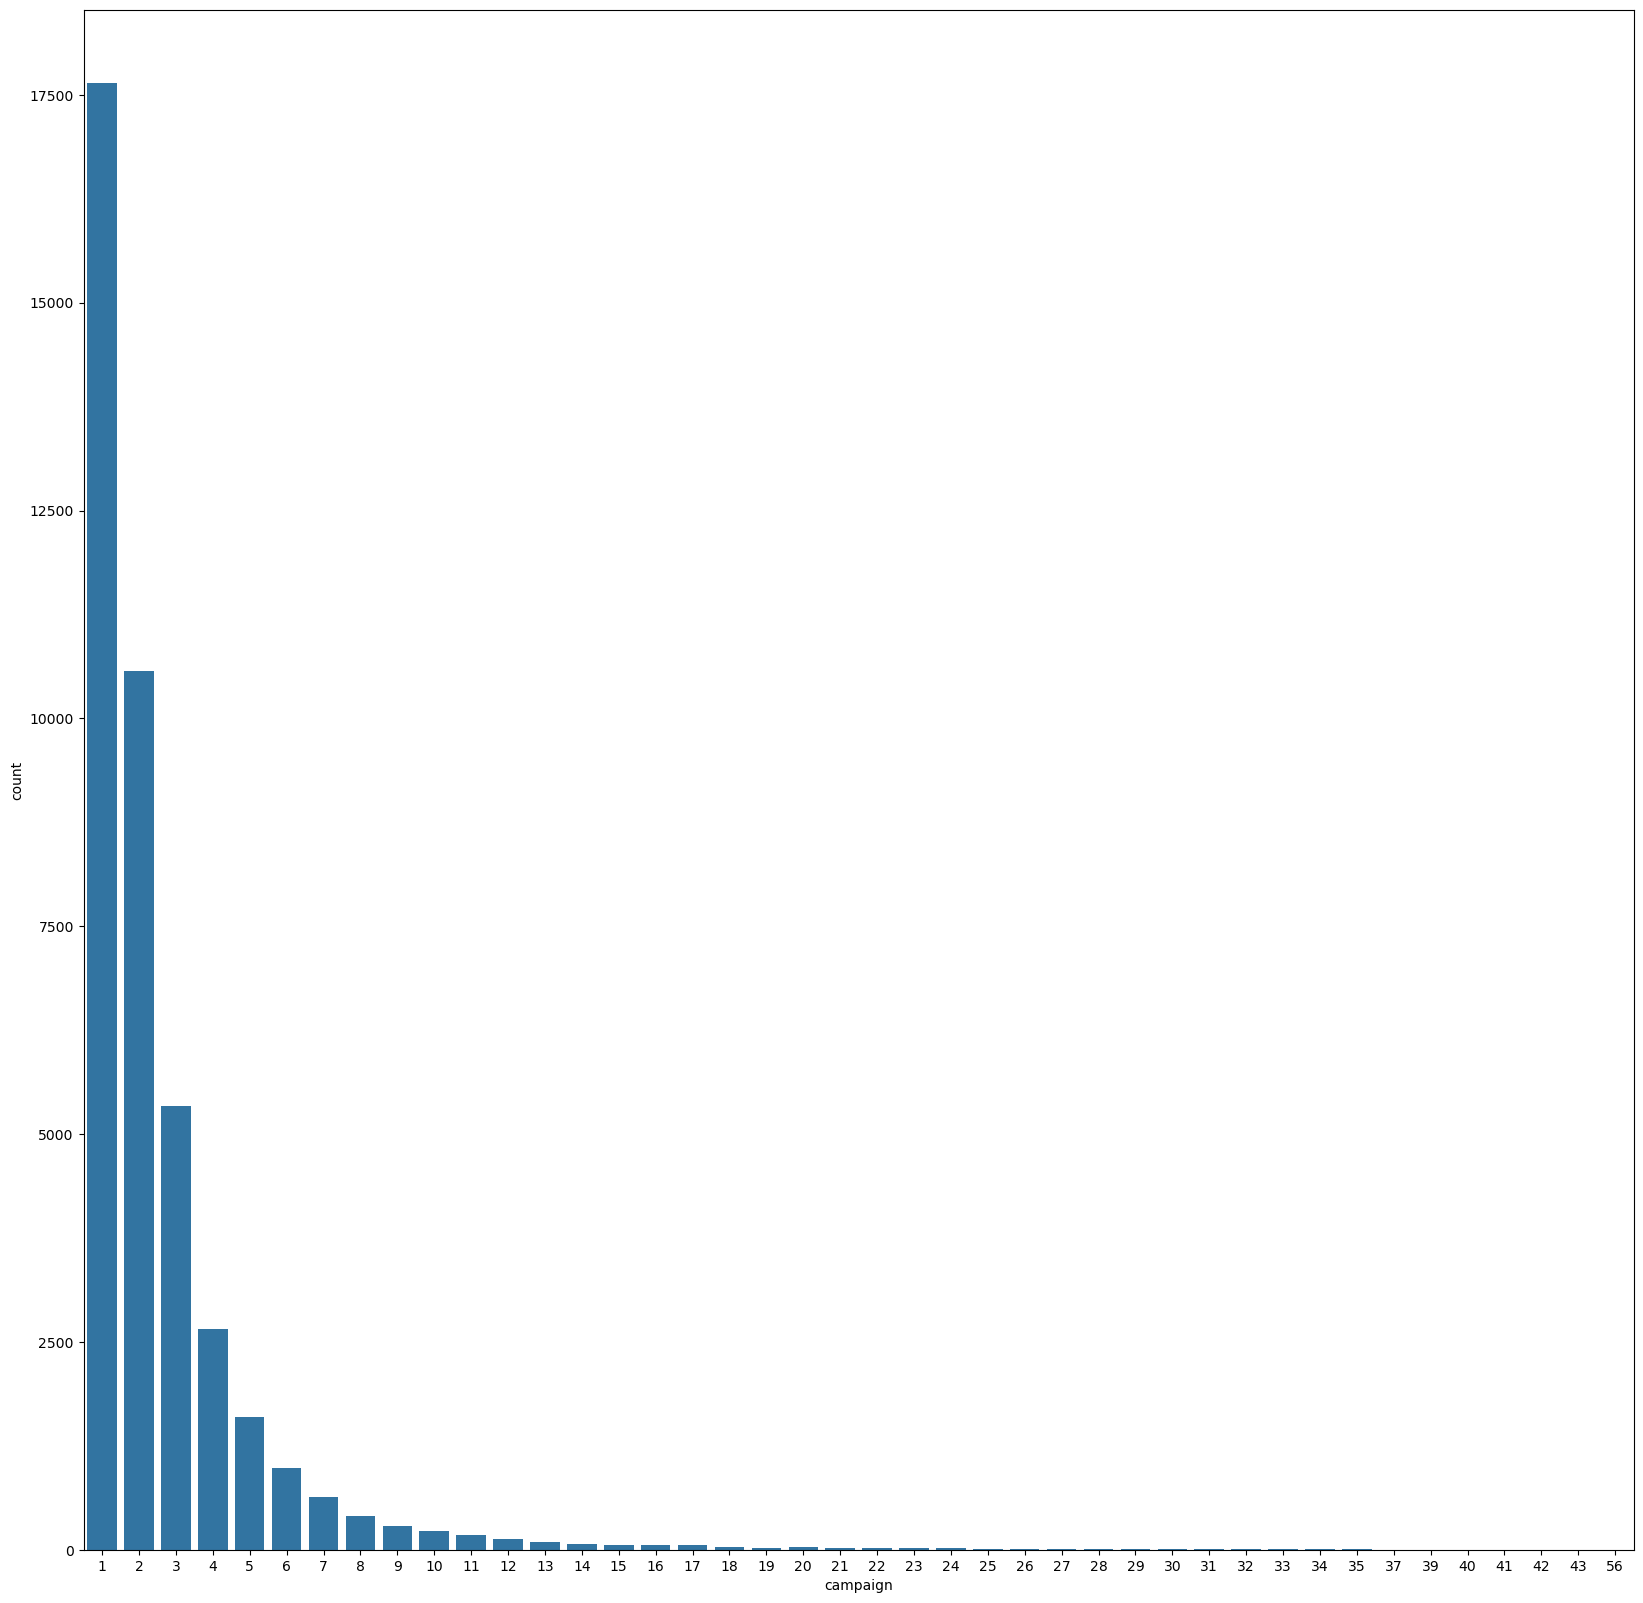

In [216]:
plt.figure(figsize=(20,20))
sns.countplot(x=df.campaign)

- **Most customers were contacted 1–2 times**.

- **Very few were contacted more than 10 times — those are rare outliers**.

- **The bars after campaign 10 are tiny — showing a very low number of customers**.



## Visual EDA for Numerical Features

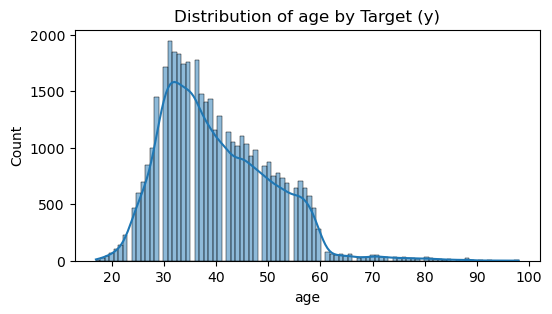

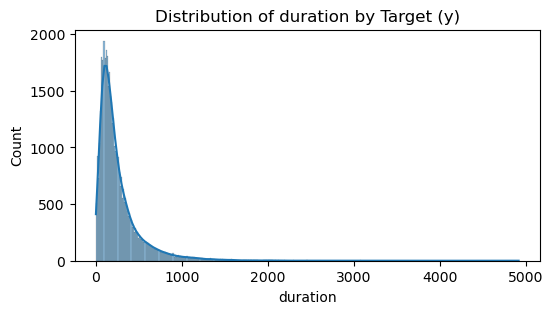

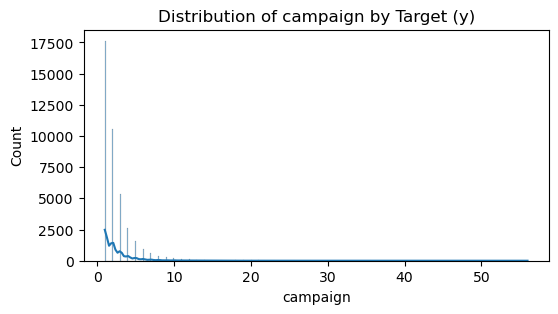

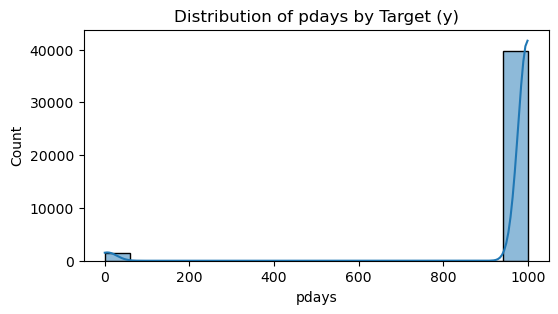

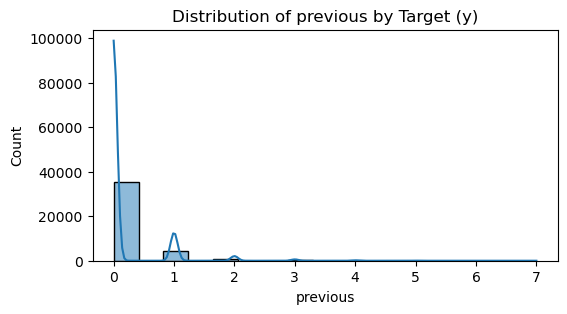

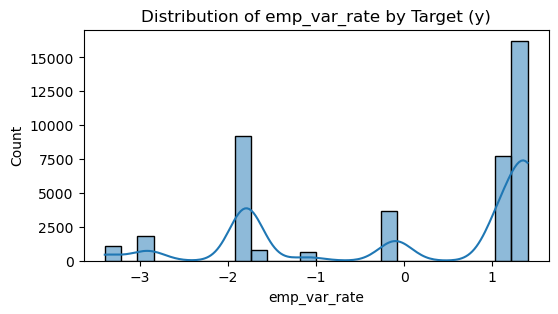

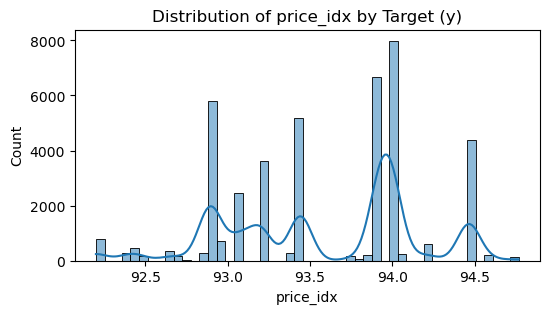

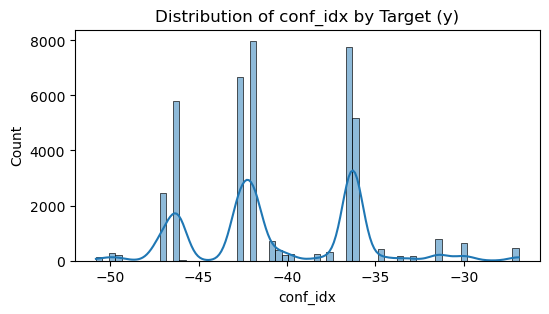

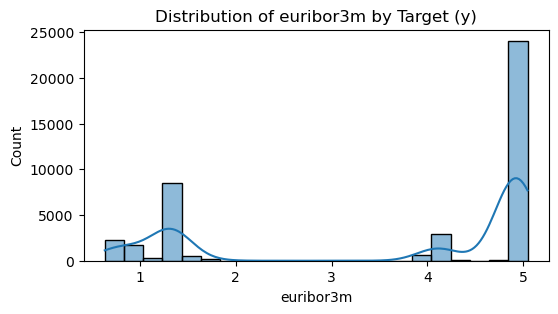

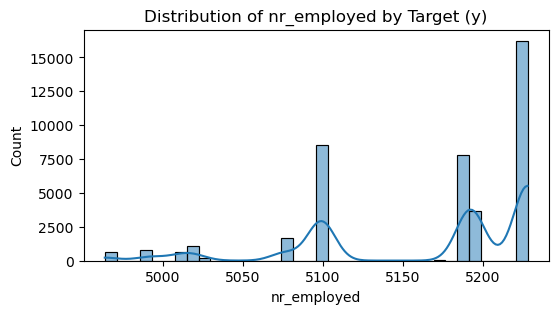

In [218]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 
                  'price_idx', 'conf_idx', 'euribor3m', 'nr_employed']

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot( x=df[col], kde=True)
    plt.title(f"Distribution of {col} by Target (y)")
    plt.show()

### Visualizing 'pdays' – How Recently Clients Were Contacted


<Axes: xlabel='pdays', ylabel='count'>

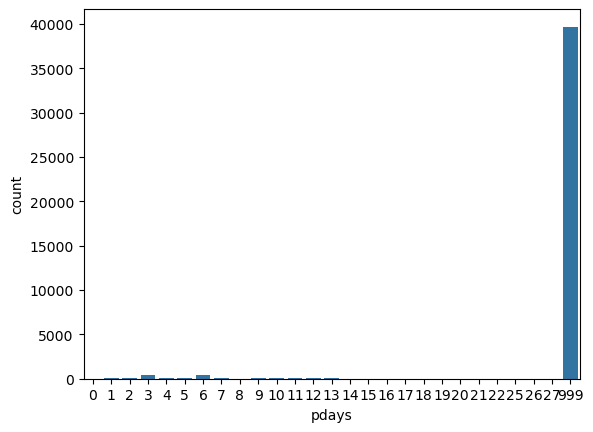

In [222]:
sns.countplot(x=df.pdays)

### Column: `pdays`
- Indicates the number of days since the client was last contacted from a **previous campaign**.
- `999` means the client was **not previously contacted**.
- Any other value (`0–998`) means the client **was contacted that many days ago**.

#### 🔍 Use Case:
Helps in analyzing whether **past contact influences** the success of the current campaign.

## Bivarient analysis

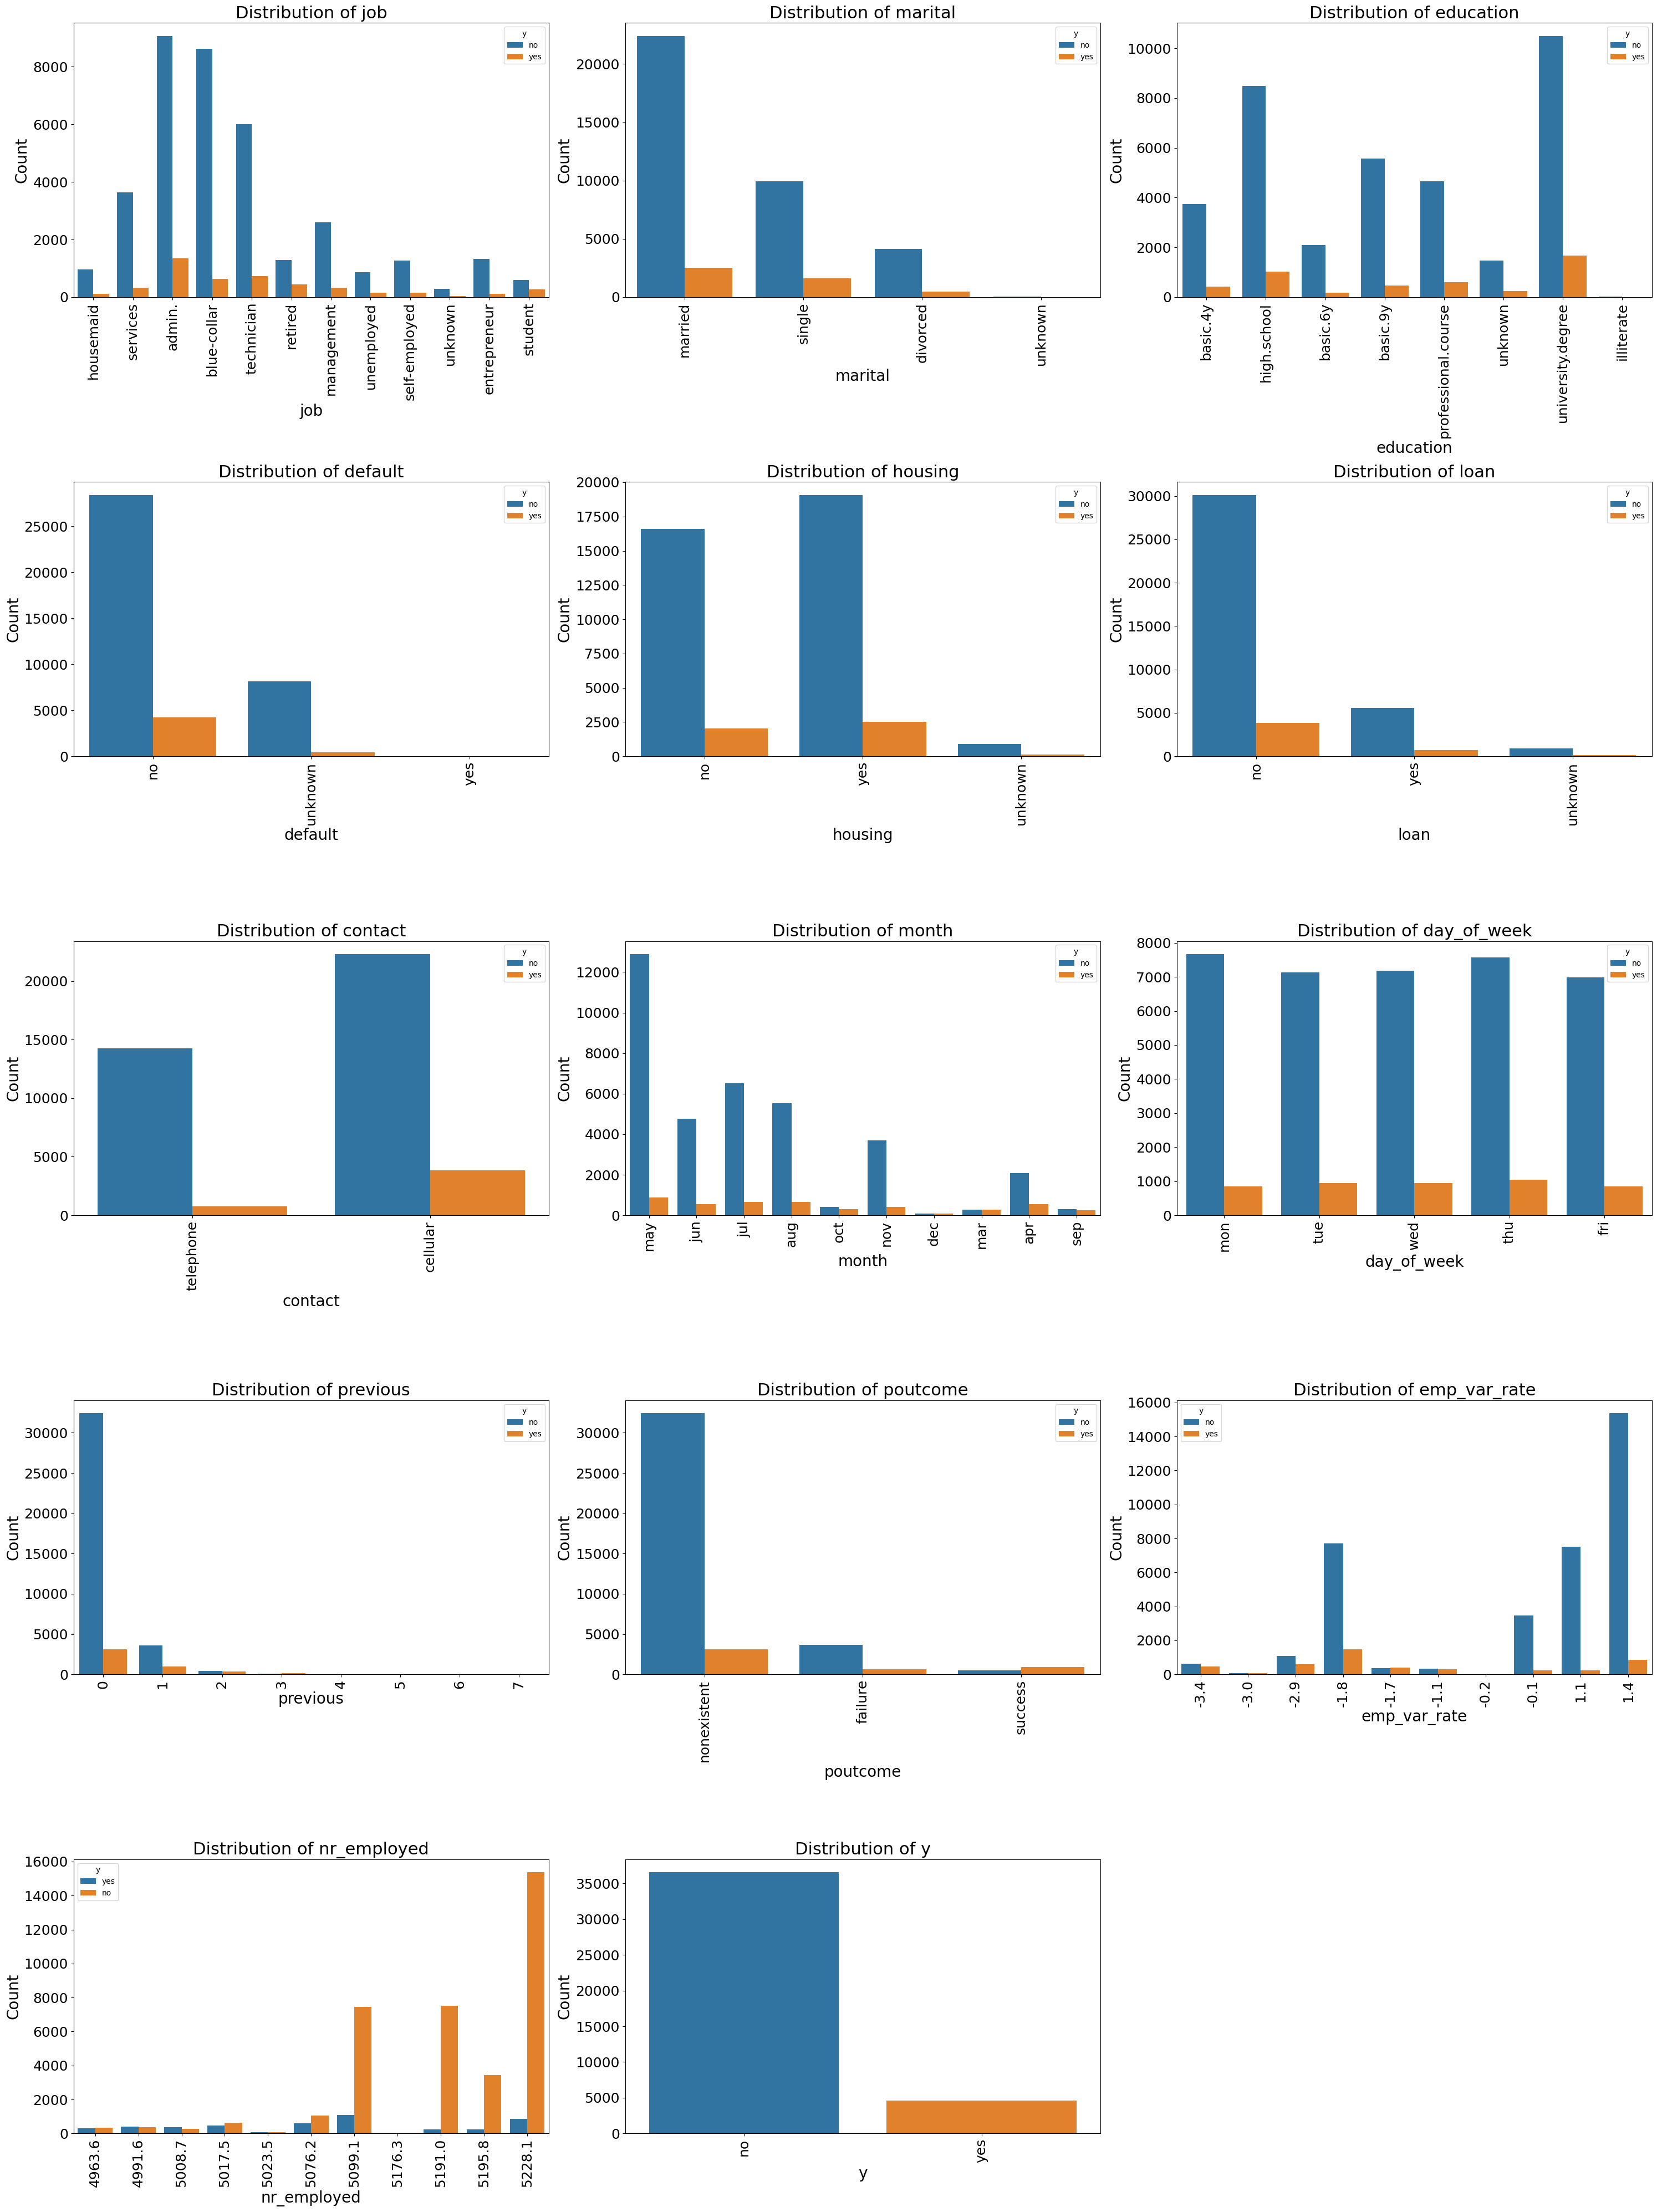

In [224]:
import math

plt.figure(figsize=(30, 40))
plotnumber = 1

# Select columns with less than 20 unique values
graph_columns = [col for col in df.columns if df[col].nunique() < 20]

for i in graph_columns:
    plt.subplot(math.ceil(len(graph_columns) / 3), 3, plotnumber)
    sns.countplot(data=df, x=i, hue='y')
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.xticks(rotation=90, fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(f'Distribution of {i}', fontsize=22)
    plotnumber += 1

plt.tight_layout()
plt.show()


## Insights

**1** . ***Job vs Campaign Response***: Most people in jobs like **blue-collar**, **management**, and **technician** were contacted.
- But very few in these jobs said "yes" (orange bars are small).
- **Retired** and **student** categories have a **higher proportion** of "yes" responses compared to others — even though their total count is low, the orange bars are relatively bigger.
- **Pattern** Even though students and retirees are few, they show higher acceptance (yes).

**🎯 Suggestion:** Target more students and retirees in future campaigns.

**2** . ***Marital vs Campaign Response***: 
- Most of the clients are ***maried*** but few of them said ***"yes"***.
- **Single People** have **Higher Proportion*** of **"yes"** responses than married or divorced ones.
  
**🎯 Suggestion:** Focus marketing efforts more on singles.

**3** . ***Education vs Campaign Response***:
- People with a **university degree** gave the **highest number of positive responses** (`yes`).
- But it’s interesting to note that even people with **basic education (4y and 9y)**, **high school**, and **professional courses** also responded **fairly well**.
- This means, the campaign was **not only successful with highly educated people**, but also with people who had **mid-level or basic education**.

🎯 **Suggestion:**  
In future campaigns, the bank can focus not only on graduates, but also include people with **basic or professional education** — they seem open and interested too!

**4** . ***Default vs Campaign Response***:
- **More contacts**: People with no credit default (No).
- **More positive responses**: People without credit default.
- **Pattern**: Financially stable clients are more likely to say yes.
  
**🎯 Suggestion**: Prefer customers with no credit default in future targeting.



**5** . ***Housing vs Campaign Response***:  
- **More contacts**: People with housing loans (Yes).
- **More positive responses**: Also more from people with housing loans.
- **Pattern**: Customers with housing loans were contacted more and responded positively more often.
  
**🎯 Suggestion**: Continue targeting customers with housing loans.


**6** . ***Personal Loan vs Campaign Response***: 
- **More contacts**: Customers without personal loans.
- **More positive responses**: Also more from customers without personal loans.
- **Pattern**: People with fewer financial burdens (no loans) are more open.
  
**🎯 Suggestion**: Focus on customers without personal loans.

**7** . ***Contact vs Campaign Response***: 
- **More contacts**: Cellular phones.
- **More positive responses**: Cellular contacts have higher yes responses.
- **Pattern**: Mobile contact method is more effective than telephone.
  
**🎯 Suggestion**: Prefer calling through mobile rather than telephone.

**8** . ***Month vs Campaign Response***:
-**More contacts**: May.
-**More positive responses**: March, September, December, and October.
-**Pattern**: High contact months don't always mean high success; fewer contacts in March/Sept/Dec still gave better results.

**🎯 Suggestion**: Plan future campaigns around March, September, December, and October.

**9** . ***Day_of_week vs Campaign Response***:
- **More contacts**: Almost equal on all weekdays.
- **More positive responses**: Slightly higher on Tuesday and Thursday.
- **Pattern**: No big variation, but midweek days (Tue, Thu) perform a little better.
  
**🎯 Suggestion**: Slightly focus calling more on Tuesdays and Thursdays.

**10** . ***Previous vs Campaign Response***:
- **More contacts**: People with 0 previous contacts.
- **More positive responses**: People with 1-2 previous contacts.
- **Pattern**: People contacted before have higher chances to say yes.
  
**🎯 Suggestion**: Try re-contacting people who were contacted once or twice earlier.

**11**. ***Poutcome vs Campaign Response***
- **More contacts**: People with nonexistent previous campaign outcome.
- **More positive responses**: People whose previous outcome was successful.
- **Pattern**: Previous successful experiences make people much more likely to say yes again.

**🎯 Suggestion**: Re-target customers who had success in past campaigns.

**12**. ***Emp_var_rate vs Campaign Response***
- **More contacts**: When emp_var_rate was higher (above 1.1).
- **More positive responses**: Also when emp_var_rate was higher (greater than 1.1).
- **Pattern**: In times of economic growth or job market improvement, customers were more willing to say yes.

**🎯 Suggestion**: Focus campaigns more actively during periods of economic expansion, as customers seem more confident to invest.

**13**. ***nr_employed vs Campaign Response***
-**More contacts**: When nr_employed was higher (around 5191 to 5228).
-**More positive responses**: Also observed when nr_employed was lower (around 5000 to 5076).
-**Pattern**: During periods of lower average employment numbers, customers were slightly more likely to respond positively, possibly due to seeking more financial stability or offers. Higher employment levels had a larger volume of contacts but a lower positive response rate.

**🎯 Suggestion**: Tailor campaigns differently based on economic climate — when employment is lower, highlight security and savings benefits; during high employment periods, emphasize investment and growth opportunities.









## Does this data represent binary or multi-class classification

In [226]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

### Checking the Class Distribution in the Target Variable

- To analyze the distribution of values in the target variable (`y`), use the `value_counts()` method. This helps determine if the dataset is **balanced or imbalanced**, which is important for **classification problems**.

In [229]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

## Bivarient analysis for Numerical Features

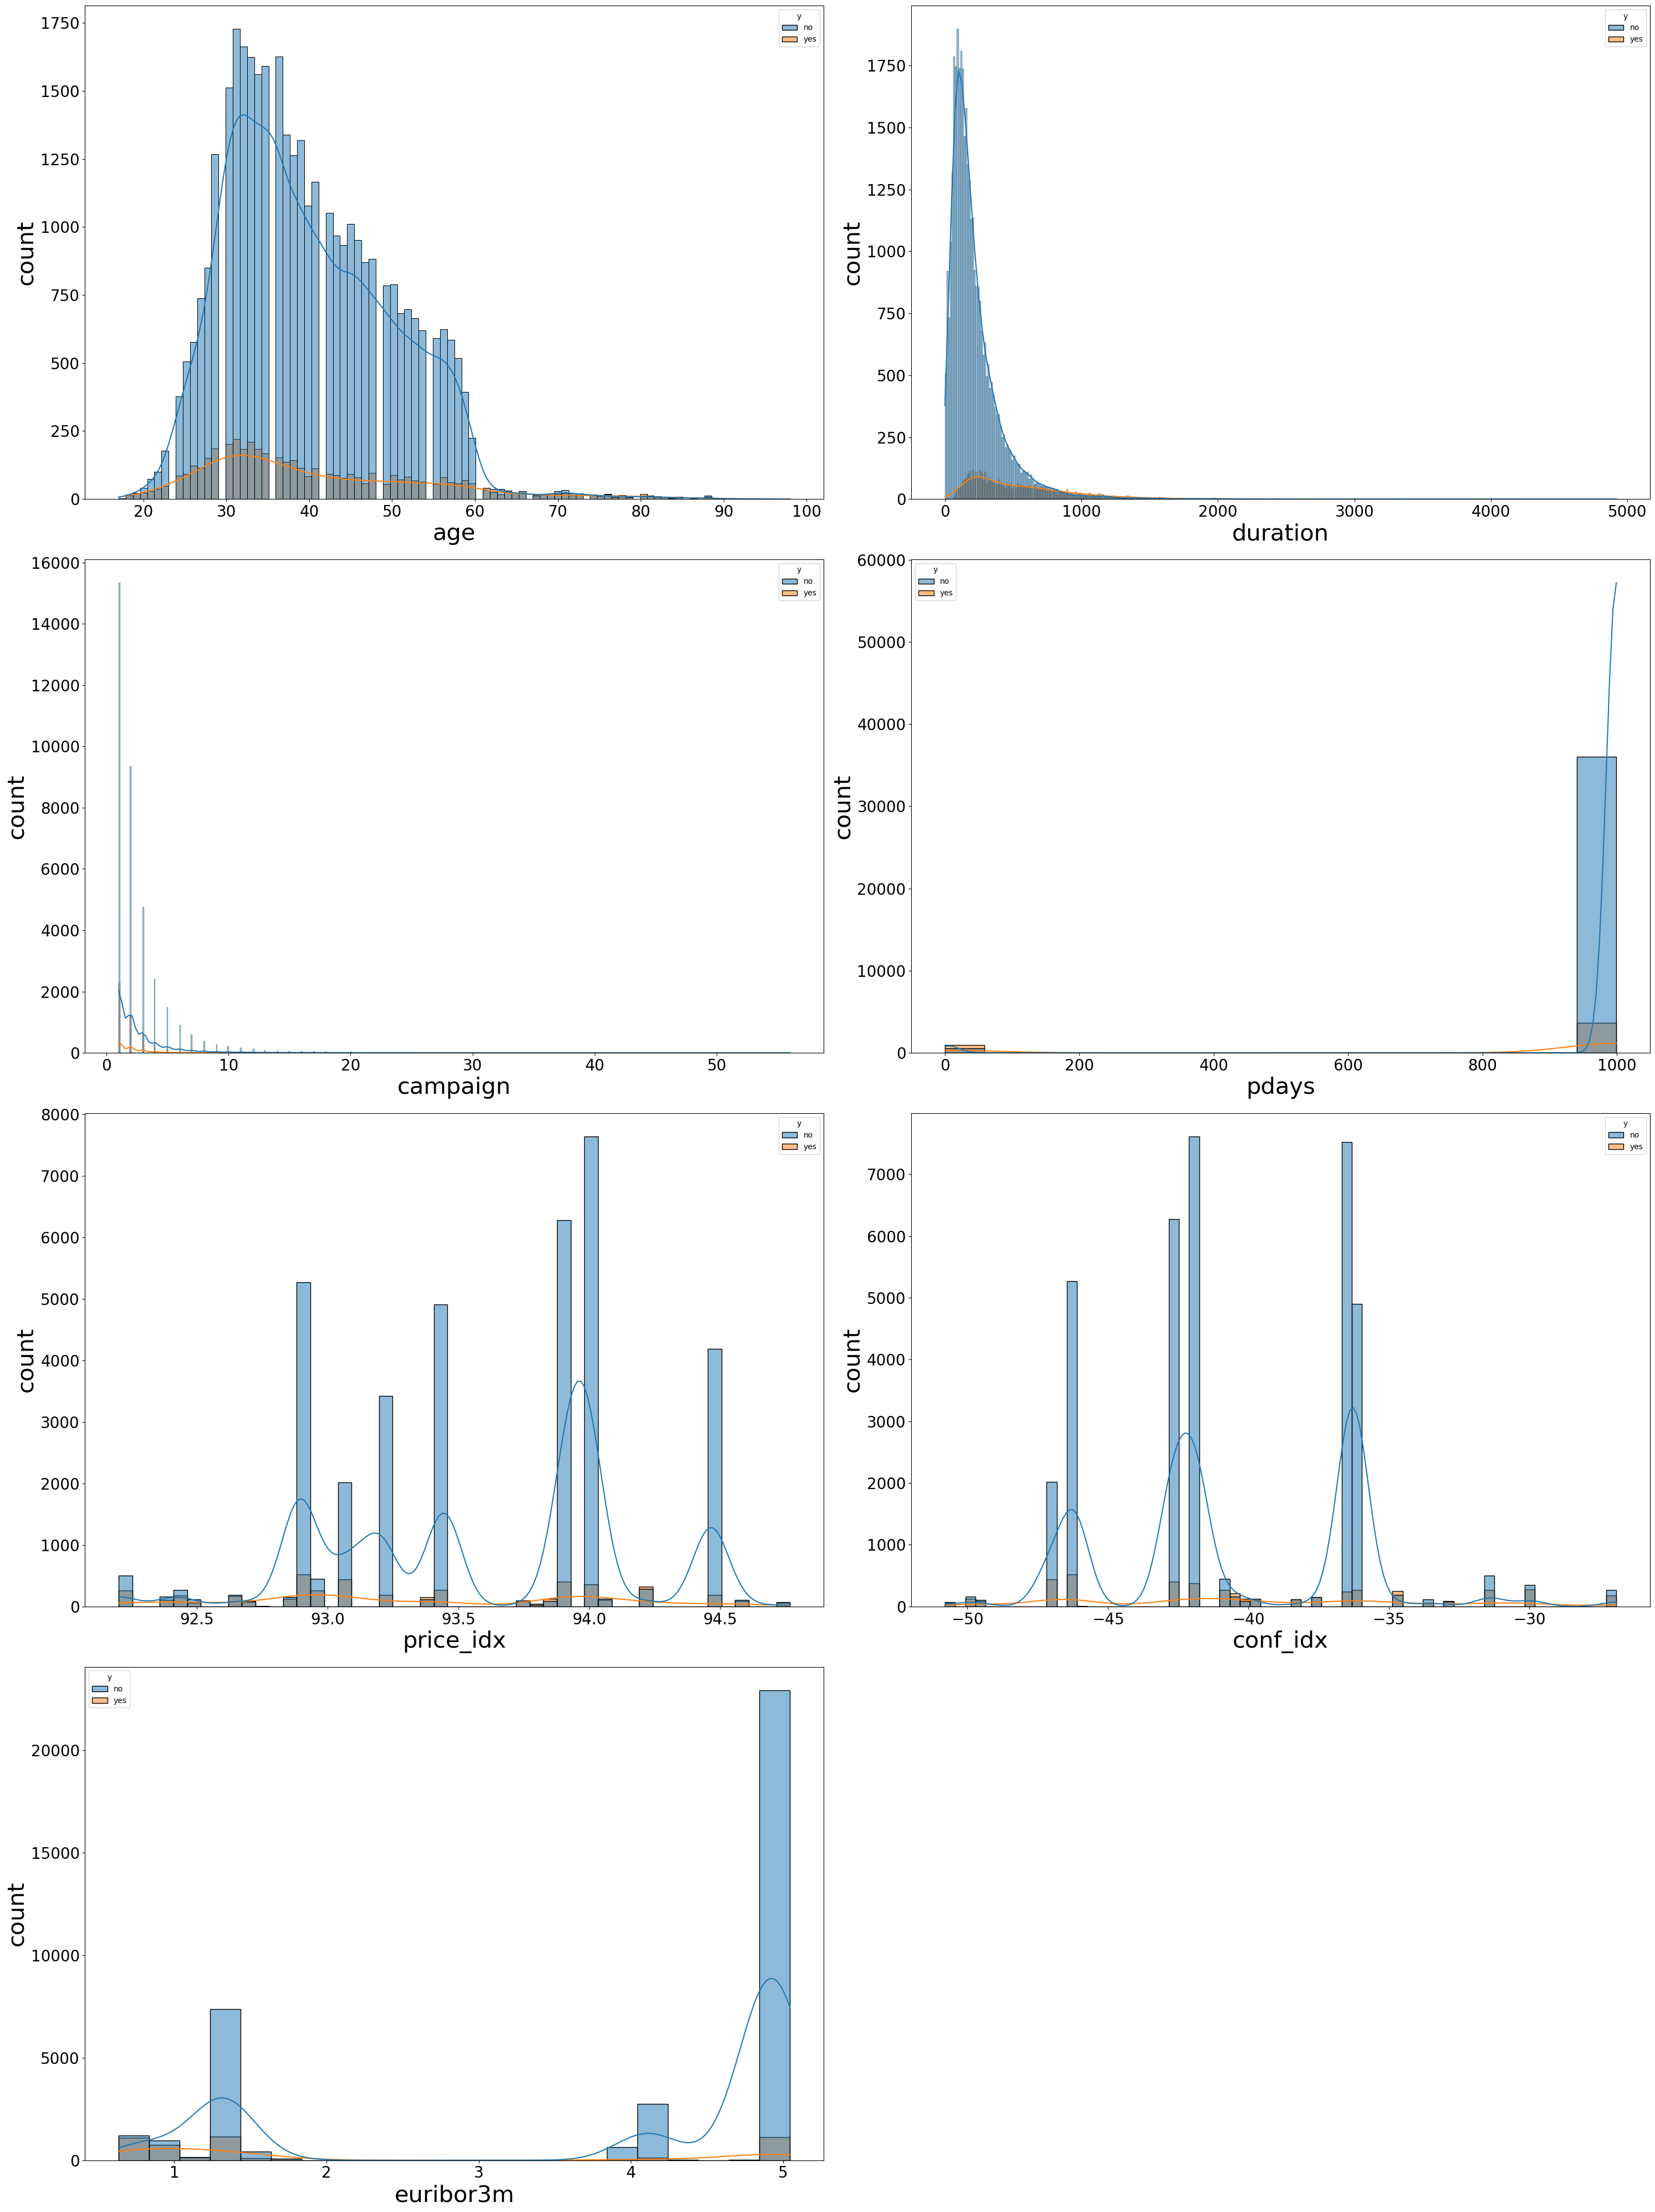

In [232]:
plt.figure(figsize=(30,40))
plotnumber = 1
graph_columns = df.select_dtypes(include='number').columns[df.select_dtypes(include='number').nunique() >20].tolist()

for i in graph_columns:
    plt.subplot(math.ceil(len(graph_columns)/2),2,plotnumber)
    sns.histplot(x=df[i],hue=df.y,kde=True)
    plotnumber += 1
    plt.xlabel(i,fontsize=30)
    plt.ylabel('count',fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
plt.tight_layout()

## Insights

**1**. ***Age vs Target (y)***
- Clients aged between **30** to **40** years have a higher proportion of **'yes'** **responses compared to other age groups**.

**2**. ***Duration vs Target (y)***
- When the call lasts longer, the chances of getting a **'yes'** from the client are much **higher**..
- **Important:** The duration is only known after the call is **completed**, so it cannot be used to predict before the call.

**3**. ***Campaign vs Target (y)***
- Clients contacted **1 to 2 times** shows a higher percentage of **'yes'** compared to those contacted multiple times.
- **More contact** attempts **(beyond the first few)** lead to **fewer 'yes'** responses, meaning the chances of a positive outcome **decrease with repeated calls**.

**4** . ***Pdays vs Target (y)***
- Clients with **lower 'pdays' values (recent contact)** have a **higher proportion of 'yes' responses**.
- Clients with **pdays = 999 (no previous contact) mostly have 'no' responses**.

**5** . ***Previous vs Target (y)***
- Clients who had successful previous contacts have a **higher chance of 'yes' subscription**.
- Clients with **zero** previous successful contacts mostly show a **'no' response**.

**6** . ***Employment Variation Rate (emp_var_rate) vs Target (y)***
- **Lower emp_var_rate (economic downturn)** is associated with a **higher proportion of 'yes'**.
- **Higher emp_var_rate** is correlated with more **'no'** responses.

**7** . ***Consumer Price Index (cons_price_idx) vs Target (y)***
- Clients contacted when the consumer price index is **lower** show a **higher rate of 'yes'**.
- A **higher** price index tends to have more **'no'** subscriptions.

**8**. ***Consumer Confidence Index (cons_conf_idx) vs Target (y)***
- A **higher consumer confidence index** is associated with a **higher** likelihood of **'yes'**.
- **Low confidence** periods tend to have more **'no'** responses.

**9** . ***Euribor 3-Month Rate (euribor3m) vs Target (y)***
- **Lower euribor3m values (0–2)** show a **higher proportion of 'yes'**.
- As euribor **increases**, **'no'** subscriptions become **more frequent**.

**10** . ***Number of Employees (nr_employed) vs Target (y)***
- When the number of employees is **lower**, there is a higher probability of **'yes'** responses.
- **Higher** nr_employed values show more **'no' responses**.

# Data Preprocessing

## Encoding Categorical Variables

##### When we work with machine learning models,
- our dataset cannot have text values like **"married", "unemployed", "yes", "no",** etc.
- Models only understand **numbers**.
- So, we need to convert (or encode) these **text (categorical) columns into numbers**.
- ✅ That's why we use **Label Encoding** — it changes **text to numbers**.

In [234]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset
df = df.copy()

# List of columns to encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 
                     'loan', 'contact', 'day_of_week', 'month', 'poutcome', 'y']

# Apply Label Encoding
label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use if needed


#### Encoded Data Preview (**text to numbers**)

In [236]:
# Checking the dataset after encoding
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Outlier Checking
***Checking for Outliers***
- Outliers are extreme values that can sometimes affect our model performance.
- We use boxplots to visualize outliers in numerical columns.

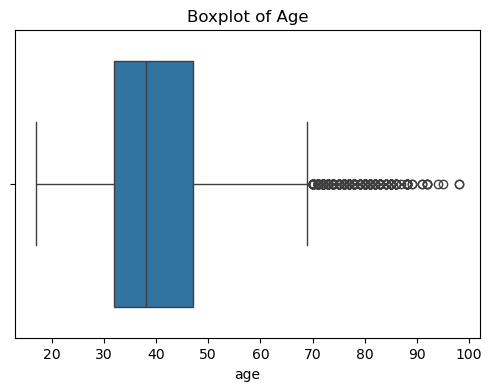

In [238]:
# Checking outliers in 'age'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()


#### Now checking outliers for all important numeric columns:

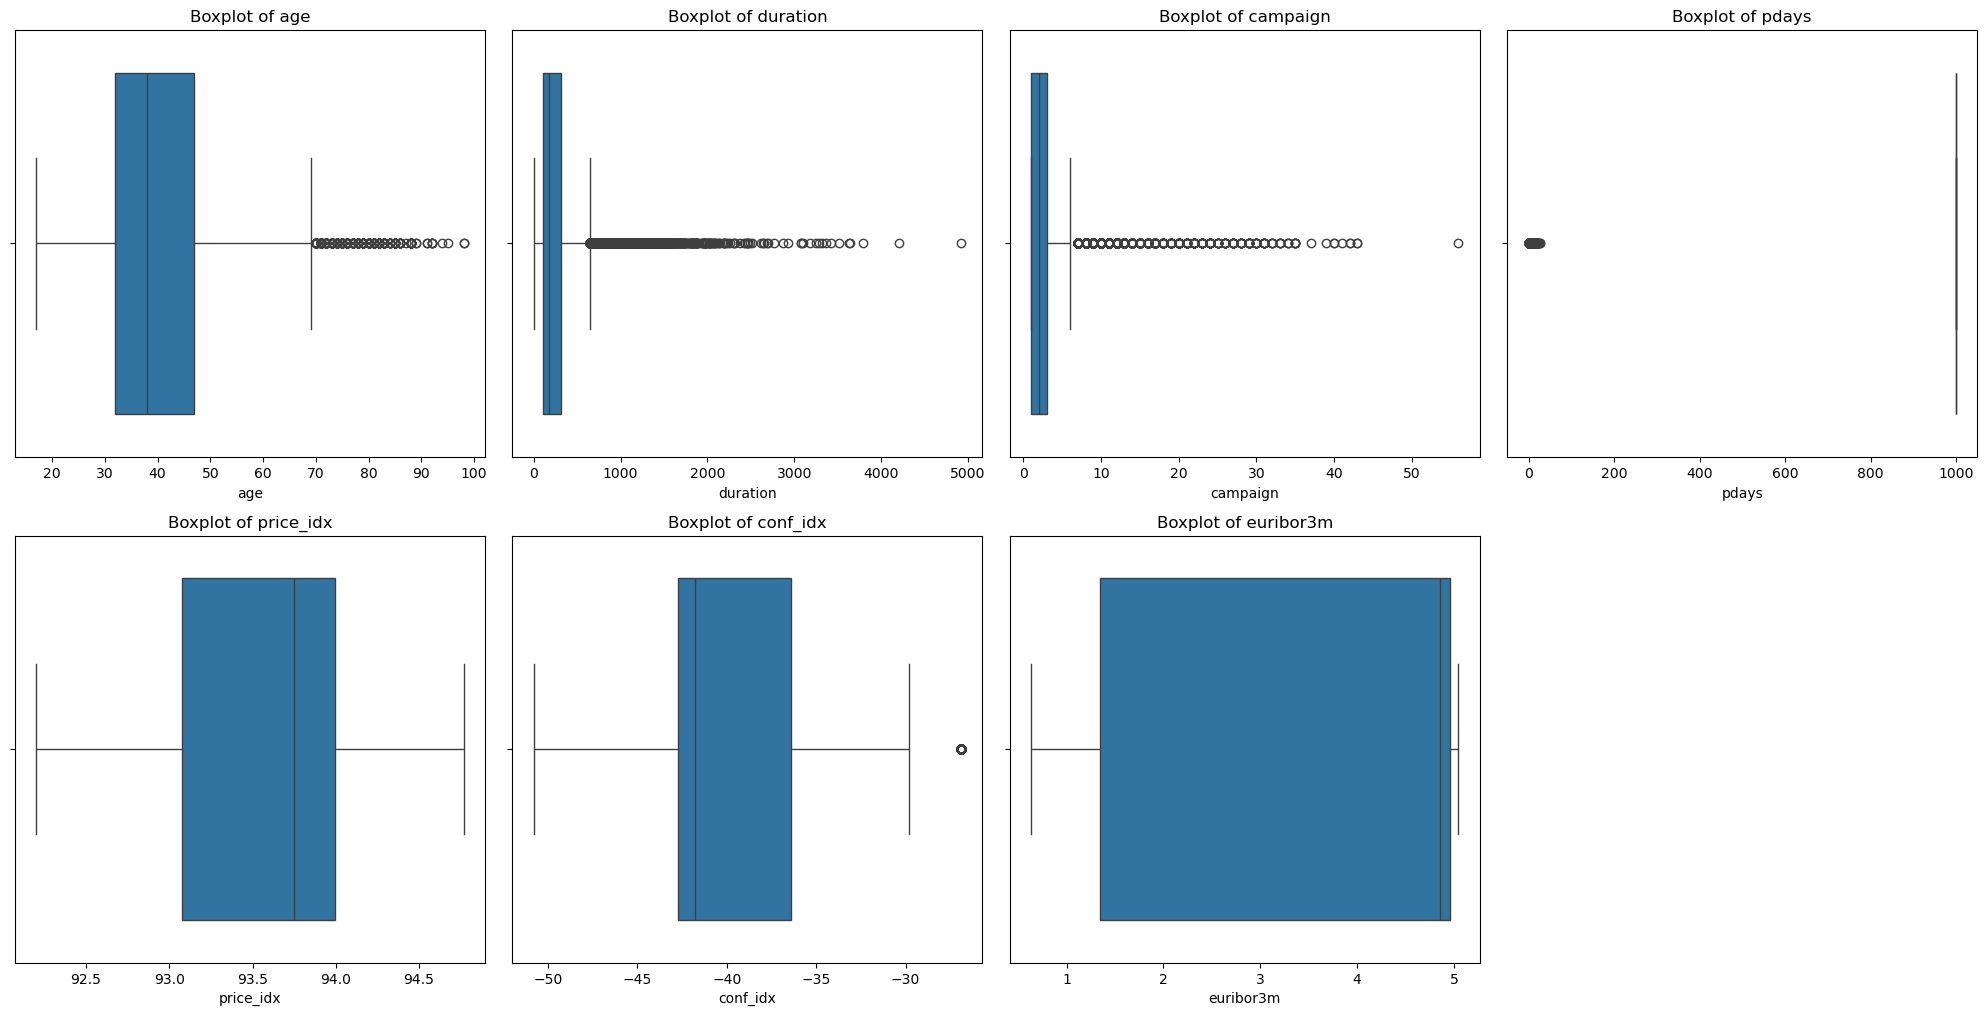

In [240]:
# Checking outliers for multiple columns
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[column].nunique() > 20:  # only columns with more unique values
        plt.subplot(5, 4, plotnumber)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plotnumber += 1

plt.tight_layout()
plt.show()

#### Most of the numeric features have some outliers.
- However, we will **not** remove outliers as they might carry important information in this marketing dataset.

## Feature Selection — Removing Useless Columns

**Feature Selection**
- Some features may not help the model much or could leak information.
- We drop features like **`duration`** because it's known after the call is completed, making it a data leak.

In [242]:
# Dropping 'duration' column as it leads to data leakage
df.drop('duration', axis=1, inplace=True)

In [244]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,price_idx,conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Checking Correlation 

***Correlation Analysis***
- We plot a heatmap to check relationships between numerical features.
- If two features are highly correlated, we can drop one to avoid multicollinearity.

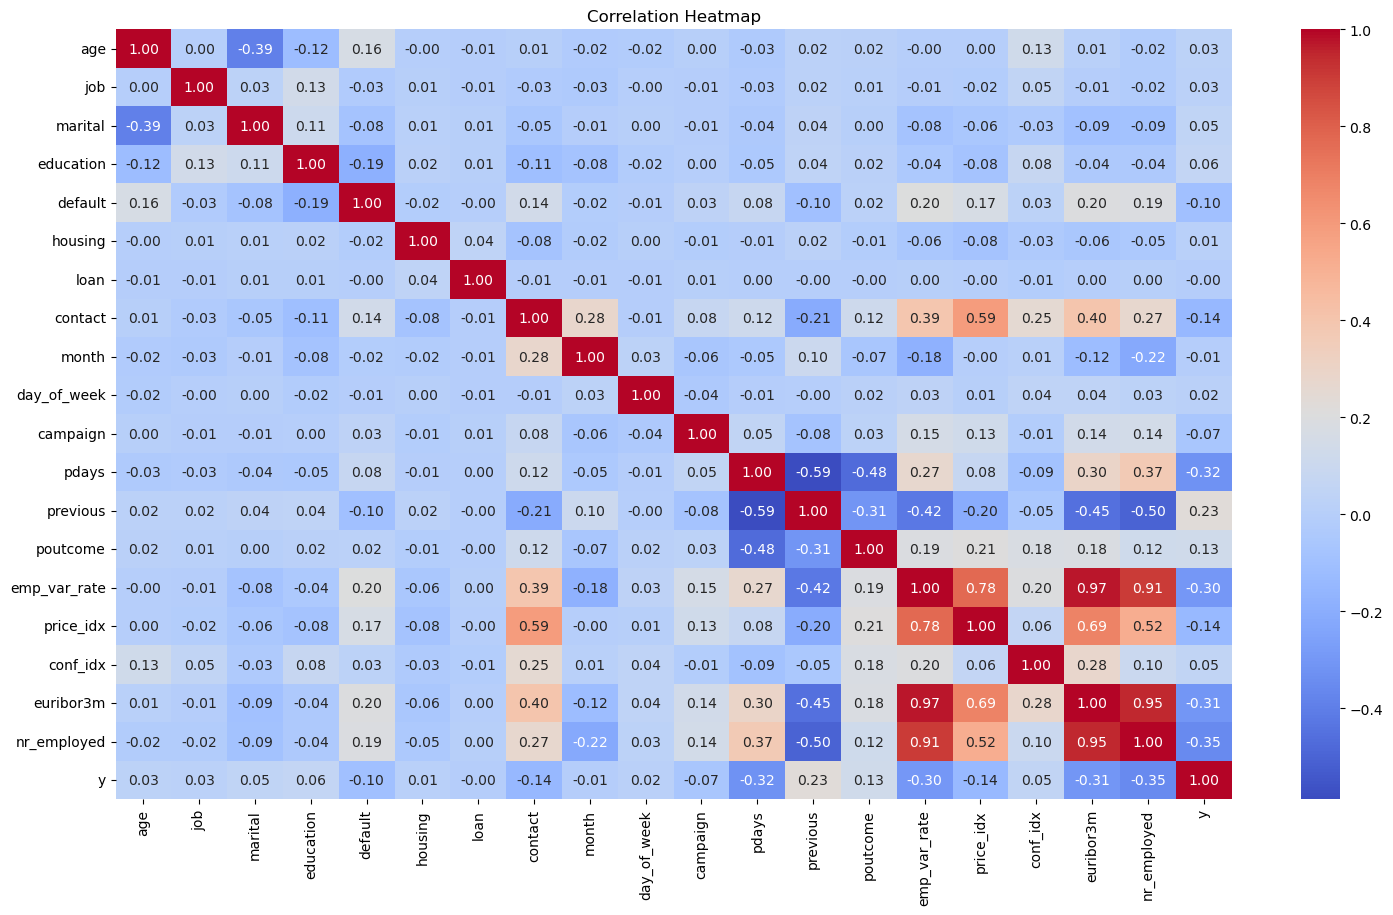

In [246]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Highly correlated features like **`euribor3m`**, **`emp_var_rate`**, and **`nr_employed`** can be **removed** to improve model performance.

## Drop Highly Correlated Features

***Dropping Highly Correlated Features***
- We drop features with strong correlations **(above 0.9)** to prevent multicollinearity problems.

In [248]:
# Dropping highly correlated features
df.drop(['euribor3m', 'nr_employed', 'emp_var_rate'], axis=1, inplace=True, errors='ignore')

#### Short Check

In [250]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,price_idx,conf_idx,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,0


### Reploting Heatmap to show final result:

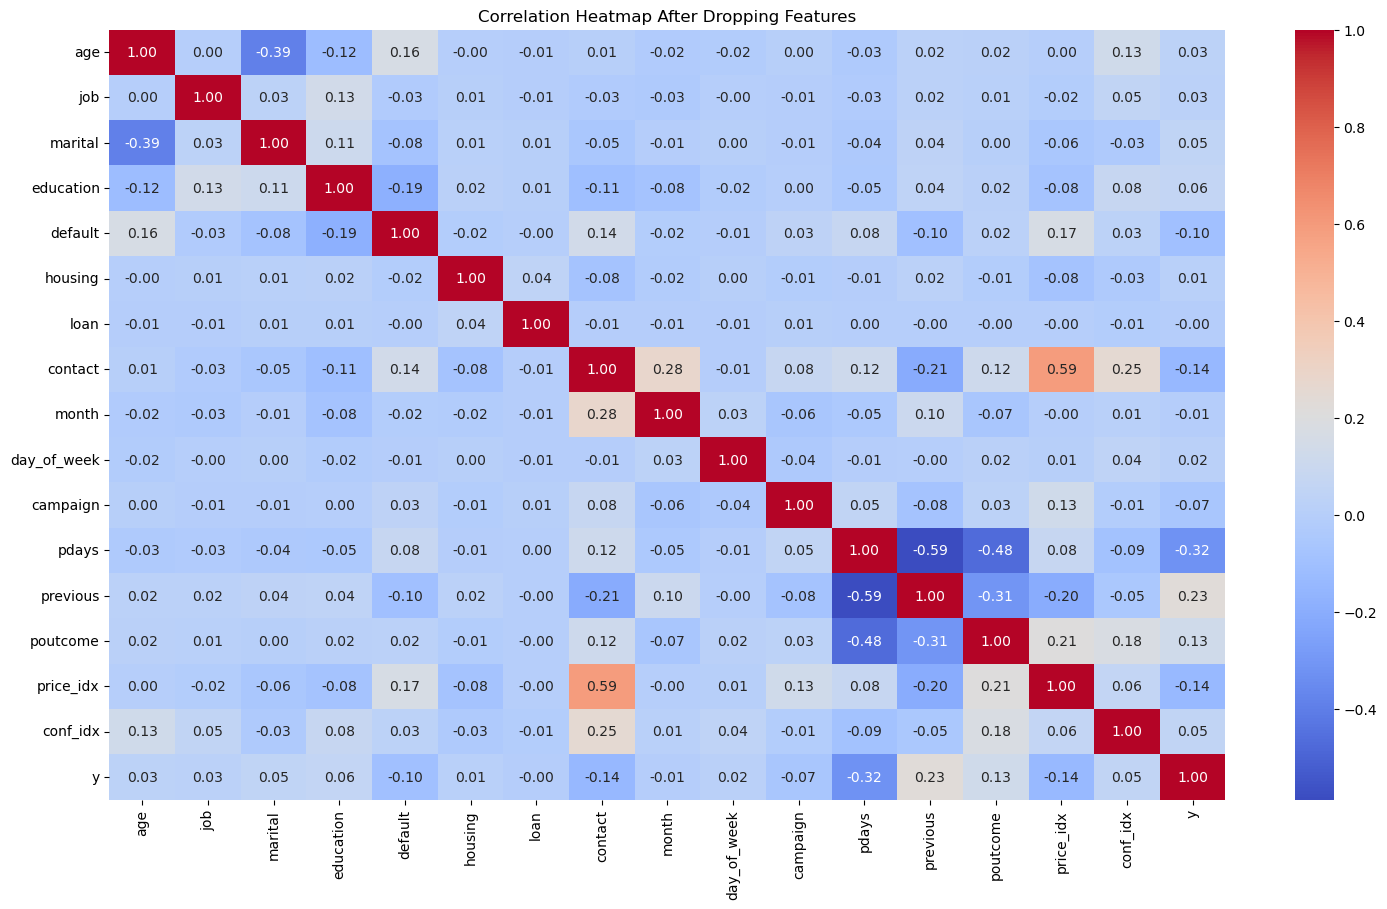

In [252]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Dropping Features')
plt.show()

# Model Creation

#### Support Vector machine (SVM) Without balanced dataset

***Simple reason:***
***Model learns patterns from X to predict y,***
***That's why we separate them!***

In [254]:
# Separate features (X) and target (y).
x = df.drop('y',axis=1)
y = df.y

In [256]:
# 1. Import the function
from sklearn.model_selection import train_test_split

# 2. Use the function to split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Refference
- test_size=0.2 : 20% of data is for testing, 80% for training.
- random_state=42 : Makes sure the split is always the same if you run the code again. (Good for consistency.)

In [258]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,price_idx,conf_idx
12556,40,1,1,2,1,2,0,1,3,1,2,999,0,1,93.918,-42.7
35451,31,0,1,6,0,0,0,0,6,1,4,999,0,1,92.893,-46.2
30592,59,5,1,0,0,0,0,0,6,1,6,999,1,0,92.893,-46.2
17914,43,3,0,2,0,2,0,0,3,3,5,999,0,1,93.918,-42.7
3315,39,0,2,3,1,0,0,1,6,2,2,999,0,1,93.994,-36.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5,1,5,1,0,0,1,6,3,2,999,0,1,93.994,-36.4
11284,37,4,1,6,0,0,0,1,4,2,1,999,0,1,94.465,-41.8
38158,35,0,1,3,0,2,0,0,8,2,1,4,1,2,92.431,-26.9
860,40,4,1,6,0,2,0,1,6,4,2,999,0,1,93.994,-36.4


#### check the size (shape) of the data after splitting.

In [260]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 16)
(8238, 16)
(32950,)
(8238,)


###### Training features - 32950 Row, 16 Columns

###### Testing features - 8238 Row, 16 Columns

In [262]:
# Import the SVC model (Support Vector Classifier) from sklearn.
from sklearn.svm import SVC

# Create a blank model (an empty SVC machine ready to learn).
sv = SVC()

# Train the model using training data (X and y).
sv.fit(x_train, y_train)


SVC()

In [263]:
y_pred = sv.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

- You give the model the test questions (x_test).
- The model gives you the predicted answers (y_pred).

#### Predicting the accuracy

In [266]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.8947560087399854

### Let see the performance of the model

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



- Class 0 = No (Customer did not subscribe)
- Class 1 = Yes (Customer did subscribe)

These are the two target labels in your binary classification.

##### classification_report() -  It compares the real answers (y_test) with the model's answers (y_pred) and shows how good the model is.

***Output shows:***

- **Precision** → How many predicted positives were actually correct.

- **Recall** → How many actual positives were caught.

- **F1-score** → A balance between precision and recall.

- **Accuracy** → How much overall model is correct.

#### Support Vector machine (SVM) Without balanced dataset



| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         | 0.61           |
| Recall     | 0.98         | 0.20           |
| F1 Score   | 0.94         | 0.30           |
| Accuracy   | 0.89         | -              |

✅ **Simple Explanation**:  
The model performs extremely well on Class 0.  
But it performs very poorly on Class 1 — recall is very low, so most actual "Yes" cases are missed.

---


## Support Vector machine (SVM) With balanced dataset

- Checking how many samples are in each class ***before*** balancing.

In [273]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
y_train.value_counts()

y
0    29245
1     3705
Name: count, dtype: int64

In [275]:
x_sm,y_sm = sm.fit_resample(x_train,y_train)
y_sm.value_counts()

y
0    29245
1    29245
Name: count, dtype: int64

- x_sm, y_sm are new balanced training data.

In [278]:
from collections import Counter

print(Counter(y_train))  # Before balancing
print(Counter(y_sm))     # After balancing

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


#### This shows how many samples in each class.
- Before SMOTE: Counter({0: 29245, 1: 3705}) means there are 29,245 samples of class 0 and only 3,705 samples of class 1. Class 1 is underrepresented.
- After SMOTE: Counter({0: 29245, 1: 29245}) means SMOTE balanced the classes, so now there are 29,245 samples in both class 0 and class 1.

### Training SVC again (with balanced data)

In [280]:
from sklearn.svm import SVC
sv1 = SVC()
sv1.fit(x_sm,y_sm)

SVC()

In [281]:
y_pred1 = sv1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [282]:
accuracy_score(y_test,y_pred1)

0.8947560087399854

In [286]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



- ***Class 0 = No (Customer did not subscribe)***
- ***Class 1 = Yes (Customer did subscribe)***

These are the two target labels in your binary classification.


### **Support Vector Machine (SVM) With Balanced Dataset**

#### **After Balancing**

| Metric     | Class 0 (No) | Class 1 (Yes) |  
|------------|--------------|----------------|  
| Precision  | **0.91**     | **0.61**       |  
| Recall     | **0.98**     | **0.20**       |  
| F1 Score   | **0.94**     | **0.30**       |  
| Accuracy   | **0.89**     | -              |  

---

### **Simple Explanation**  
1. **For Class 0 ("No")**:  
   - **Precision (0.91)**: When the model predicts "No", it’s correct **91%** of the time.  
   - **Recall (0.98)**: It correctly identifies **98% of all actual "No" cases**.  
   - **High Performance**: Excellent at detecting "No" cases.  

2. **For Class 1 ("Yes")**:  
   - **Precision (0.61)**: When it predicts "Yes", it’s correct **61%** of the time.  
   - **Recall (0.20)**: It only detects **20% of actual "Yes" cases** (misses 80%).  
   - **Poor Performance**: Struggles to identify "Yes" cases reliably.  

3. **Overall Accuracy (0.89)**:  
   - The model is **89% accurate overall**, but this is misleading because it’s biased toward predicting "No" (majority class).  

---

## Logistic Regression
- **Logistic Regression** is a supervised machine learning algorithm used for binary or multiclass classification tasks 

#### Without Balancing

In [288]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

- Imports the logistic regression model,
- **`(max_iter=10000)`** this mean Creates the model with a higher iteration limit to avoid convergence warnings,
- Trains it on your data (x_train, y_train) so it can learn to classify future data

In [290]:
y_pred_lr=LR.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [291]:
accuracy_score(y_test,y_pred_lr)

0.8954843408594318

In [295]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.63      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238



## Logistic Regression Without Balancing
Type of Problem: ***Binary Classification***


| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         | 0.63           |
| Recall     | 0.99         | 0.19           |
| F1 Score   | 0.94         | 0.29           |
| Accuracy   |0.895         | -              |

✅ **Simple Explanation**:  
Class 0 predictions are near-perfect (99% recall), but Class 1 detection is very poor (19% recall). High accuracy is misleading due to imbalanced data.

### Logistic Regression With Balancing

In [297]:
LR1 = LogisticRegression(max_iter=10000) # Create model with more iterations
LR1.fit(x_sm,y_sm) # Train model on input (x_sm) and target (y_sm)

LogisticRegression(max_iter=10000)

In [298]:
y_pred_lr1 = LR1.predict(x_test)
y_pred_lr1

array([0, 0, 1, ..., 0, 0, 0])

In [299]:
accuracy_score(y_test,y_pred_lr1)

0.6756494294731731

#### Accuracy Drop After Balancing Data (Logistic Regression)

In [304]:
print(classification_report(y_test,y_pred_lr1))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      7303
           1       0.18      0.53      0.27       935

    accuracy                           0.68      8238
   macro avg       0.55      0.61      0.53      8238
weighted avg       0.84      0.68      0.73      8238



### Logistic Regression With Balancing

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.92         | 0.18           |
| Recall     | 0.69         | 0.53           |
| F1 Score   | 0.79         | 0.27           |
| Accuracy   | 0.678         | -              |

✅ **Simple Explanation**:  
Class 1 detection improves (53% recall), but precision drops sharply (18%). Overall accuracy falls as the model makes more errors on Class 0.



### K-nearest neighbors (KNN) (without balanced data)

-  K-Nearest Neighbors (KNN) is a simple, distance-based classification algorithm that predicts the class of a data point by looking at the majority class among its 'k' nearest neighbors. In this project, KNN is used after balancing the dataset to classify outcomes more fairly across both majority and minority classes. Since KNN makes no assumptions about the data distribution, it helps in capturing local patterns, especially in complex or non-linear datasets.

In [307]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 8)

- knn is the name of the model you're creating.
- n_neighbors=8 means the model will look at the 8 nearest neighbors (based on distance) to decide the class of a new data point.
- It checks the 8 closest data points in the training set.
- Then it assigns the most common class among those 8 to the new point.

In [309]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [311]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

#### Accuracy Check

In [312]:
accuracy_score(y_test,y_pred_knn)

0.8914785142024764

In [315]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7303
           1       0.57      0.18      0.27       935

    accuracy                           0.89      8238
   macro avg       0.74      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238



## K-Nearest Neighbors (KNN) Without Balancing

**Type of Problem**: Binary Classification



| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.90         | 0.57           |
| Recall     | 0.98         | 0.18           |
| F1 Score   | 0.94         | 0.27           |
| Accuracy   | 0.89         | -              |

✅ **Simple Explanation**:  
- Class 0 predictions are excellent (98% recall), but Class 1 detection is very poor (18% recall).
- High accuracy (89.1%) is misleading due to imbalanced data favoring Class 0.


### K-nearest neighbors (KNN) (with balanced data)

In [317]:
knn1 = KNeighborsClassifier(n_neighbors= 8)

In [319]:
knn1.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=8)

In [321]:
y_pred_knn1=knn1.predict(x_test)
y_pred_knn1

array([1, 0, 0, ..., 0, 0, 1])

In [322]:
accuracy_score(y_test,y_pred_knn1)

0.7906045156591406

#### Accuracy Drop After Balancing Data  K-nearest neighbors (KNN)

In [325]:
print(classification_report(y_test,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7303
           1       0.28      0.54      0.37       935

    accuracy                           0.79      8238
   macro avg       0.61      0.68      0.62      8238
weighted avg       0.86      0.79      0.82      8238



## K-Nearest Neighbors (KNN) With Balancing Data

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.93         | 0.28           |
| Recall     | 0.82         | 0.54           |
| F1 Score   |0.87          | 0.37          |
| Accuracy   | 0.79         | -              |

**Simple Explanation**:  

- Class 1 detection improves significantly (recall jumps from 18% → 54%).

- Precision for Class 1 drops sharply (57% → 28%) – many false alarms.

- Accuracy drops (89.1% → 78.9%) as the model makes more errors on Class 0.

### Decision Tree Classifier (Unbalanced dataset)

- The Decision Tree model is a supervised classification algorithm that splits data into branches based on feature values, making it easy to interpret and understand. In this project, I’m using the Decision Tree to predict outcomes based on both balanced and unbalanced data. It helps identify clear decision boundaries and works well with categorical and numerical features. By applying it to both data setups, we can see how balancing affects the model's ability to correctly classify both majority and minority classes

In [328]:
## Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Unbalanced data
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Predict on test set
y_pred = dt.predict(x_test)
y_pred

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

print("📊 Decision Tree - Unbalanced Data")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

📊 Decision Tree - Unbalanced Data
Accuracy: 0.8367322165574168
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.30      0.34      0.32       935

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.84      0.84      0.84      8238



## Decision Tree (Without Balancing Data)
**Type of Problem**: Binary Classification

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         |0.30           |
| Recall     | 0.90         | 0.34           |
| F1 Score   | 0.91         | 0.32          |
| Accuracy   | 0.837        | -              |

✅ **Simple Explanation**:  
- Class 0: Strong performance (90% recall, 91% precision).

- Class 1: Poor performance (34% recall, 30% precision).

- Accuracy: 83.7% – decent but misleading due to imbalanced data.

In [330]:
## Balancing the Data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x_train, y_train)

# Check class distribution before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_sm))


Before SMOTE: Counter({0: 29245, 1: 3705})
After SMOTE: Counter({0: 29245, 1: 29245})


In [332]:
### Decision Tree after Balancing
dt1 = DecisionTreeClassifier()
dt1.fit(x_sm, y_sm)

# Predict on test set
y_pred1 = dt1.predict(x_test)
y_pred1

# Evaluation
print("📊 Decision Tree - Balanced Data")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


📊 Decision Tree - Balanced Data
Accuracy: 0.8092983733915999
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7303
           1       0.27      0.39      0.31       935

    accuracy                           0.81      8238
   macro avg       0.59      0.62      0.60      8238
weighted avg       0.84      0.81      0.82      8238



## Decision Tree (With Balanced Data)

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.92         | 0.27           |
| Recall     | 0.86         | 0.39           |
| F1 Score   | 0.89         | 0.31           |
| Accuracy   | 0.81         | -              |

**Simple Explanation**:  
- Class 1: Recall improves (34% → 37%), but precision drops (30% → 26%).

- Class 0: Recall drops slightly (90% → 86%).

- Accuracy: Drops to 80.8% due to more errors on Class 0.

## Gradient Decent Boosting (without balanced data)

***Gradient Boosting Model – What and Why***
Gradient Boosting is an ensemble learning technique that builds multiple decision trees sequentially, with each tree correcting the errors of the previous one. It is known for its high accuracy and ability to model complex patterns.

***Why I'm using it in this project:***
In the Portuguese Bank Marketing project, I'm using the Gradient Boosting model to accurately predict whether a client will subscribe to a term deposit. Its strength in handling imbalanced data and capturing subtle patterns in customer behavior makes it a suitable choice for improving prediction performance.

In [337]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier() 
gbm.fit(x_train,y_train) 

GradientBoostingClassifier()

In [338]:
y_gbm = gbm.predict(x_test)

In [339]:
accuracy_score(y_test,y_gbm)

0.8973051711580481

In [340]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.22      0.33       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



## Gradient Decent Boosting (without balanced data)

**Type of Problem**: Binary Classification

Before Balancing

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         | 0.64           |
| Recall     | 0.98         | 0.22           |
| F1 Score   | 0.94         | 0.33           |
| Accuracy   | 0.90         | -              |

✅ **Simple Explanation**:  
- lass 0: Near-perfect recall (98%) and high precision (91%).

- Class 1: Very poor recall (22%) but decent precision (64%).

- Accuracy: 89.7% – misleadingly high due to imbalanced data.


## Gradient Decent Boosting (with balanced data)

In [347]:
### Gradient Boosting Classifier - Model Training
gbm1 = GradientBoostingClassifier()  # Create the model
gbm1.fit(x_sm, y_sm)                 # Train the model on balanced data

GradientBoostingClassifier()

In [348]:
y_gbm1 = gbm1.predict(x_test)
print(accuracy_score(y_test,y_gbm1))
print(classification_report(y_test,y_gbm1))

0.8268997329448895
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7303
           1       0.33      0.52      0.41       935

    accuracy                           0.83      8238
   macro avg       0.63      0.69      0.65      8238
weighted avg       0.87      0.83      0.84      8238



## Gradient Decent Boosting (with balanced data)

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.93         | 0.33          |
| Recall     | 0.87         | 0.52           |
| F1 Score   | 0.90         | 0.41           |
| Accuracy   | 0.83         | -              |

✅ **Simple Explanation**:  

Class 1: Recall doubles (22% → 51%) with balanced data, but precision drops (64% → 34%).

Class 0: Slight drop in recall (98% → 87%) and precision (91% → 93%).

Accuracy: Drops to 83% as the model makes more Class 0 errors.

In [352]:
x_train.info() ## Displays the structure of the training dataset (column types, non-null counts).

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 12556 to 15795
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32950 non-null  int64  
 1   job          32950 non-null  int32  
 2   marital      32950 non-null  int32  
 3   education    32950 non-null  int32  
 4   default      32950 non-null  int32  
 5   housing      32950 non-null  int32  
 6   loan         32950 non-null  int32  
 7   contact      32950 non-null  int32  
 8   month        32950 non-null  int32  
 9   day_of_week  32950 non-null  int32  
 10  campaign     32950 non-null  int64  
 11  pdays        32950 non-null  int64  
 12  previous     32950 non-null  int64  
 13  poutcome     32950 non-null  int32  
 14  price_idx    32950 non-null  float64
 15  conf_idx     32950 non-null  float64
dtypes: float64(2), int32(10), int64(4)
memory usage: 3.0 MB


### XGBoost
- XGBoost is a powerful machine learning model that combines many decision trees to make accurate predictions. It works well with large and complex data and is especially useful when the data is imbalanced, like in my project where most customers said "no" to a term deposit. I used XGBoost in this project because it gives high accuracy, handles imbalance better, and helps understand which factors influence a customer’s decision.

## XGBoost (without balanced data)

In [354]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [356]:
y_hat = xgb_r.predict(x_test)
print(accuracy_score(y_test,y_hat))
print(classification_report(y_test,y_hat))

0.8941490653071134
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.57      0.28      0.37       935

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



## XGBoost (without balanced data)

  
**Type of Problem**: Binary Classification

###  Before Balancing

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         | 0.57           |
| Recall     | 0.97         | 0.28           |
| F1 Score   | 0.94         | 0.37           |
| Accuracy   | 0.89         | -              |

✅ **Simple Explanation**:  

- Class 0: Excellent performance (97% recall, 91% precision).

- Class 1: Poor recall (28%) but decent precision (57%).

- Accuracy: 89.4% – high but misleading due to imbalanced data.

## XGBoost (with balanced data)

In [358]:
from xgboost import XGBClassifier
xgb_r1=XGBClassifier() 
xgb_r1.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [360]:
y_hat1 = xgb_r1.predict(x_test)
print(accuracy_score(y_test,y_hat1))
print(classification_report(y_test,y_hat))

0.8561544064093226
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.57      0.28      0.37       935

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



## XGBoost (with balanced data)

| Metric     | Class 0 (No) | Class 1 (Yes) |
|------------|--------------|----------------|
| Precision  | 0.91         | 0.57           |
| Recall     | 0.97         | 0.28           |
| F1 Score   | 0.94         | 0.37           |
| Accuracy   | 0.857         | -              |

✅ **Simple Explanation**:  

- **Identical metrics to unbalanced data**: Balancing had **no impact** on **Class 1** performance.

- **Accuracy drops slightly** (89.4% → 85.7%) due to potential overfitting or ineffective balancing.

## Hyperparameter tuning XGBoost

#### Hyperparameter tuning is the process of finding the best settings for a machine learning model to make it work better.

- In simple words, machine learning models have some settings (called hyperparameters) that we choose before training—like how fast the model learns or how many trees to use in a forest. Tuning means trying different values for these settings to see which ones give the best results.

### Why HyperParameter tuning?

- In your Portuguese Bank Marketing project, you're predicting whether a client will subscribe to a term deposit. 
Since the data is slightly imbalanced and the decision is sensitive, better-tuned models help improve precision and recall, 
which is very important in real-life business decisions.

- it's also about finding the best combination of parameters that makes a model perform well on unseen data (i.e., not just training accuracy but validation or test accuracy too).

In [362]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [364]:
## Define Parameter Grid for Tuning
param_grid = {
    'gamma': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'n_estimators': [50, 65, 80, 100, 115, 130, 150],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200],
    'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 200]
}


### Hyperparameter Tuning (Without Balancing)

In [366]:
xgb = XGBClassifier(random_state=42, verbosity=0)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=1000,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(x_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25, 0.3,
                                                          0.4, 0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='accuracy', verbose=2)

#### Train Final Model and Evaluate (Without Balancing)

In [367]:
best_params = search.best_params_
print("Best parameters (without balancing):", best_params)

xgb_best = XGBClassifier(**best_params)
xgb_best.fit(x_train, y_train)

y_pred = xgb_best.predict(x_test)

print("Accuracy (without balancing):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters (without balancing): {'reg_lambda': 12.8, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.8}
Accuracy (without balancing): 0.8977907259043457
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.23      0.34       935

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



## Hyperparameter Tuning (With Balanced Data - x_sm, y_sm)

In [368]:
search_bal = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=1000,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search_bal.fit(x_sm, y_sm)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25, 0.3,
                                                          0.4, 0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='accuracy', verbose=2)

## Train Final Model and Evaluate (With Balancing)

In [370]:
best_params_bal = search_bal.best_params_
print("Best parameters (with balancing):", best_params_bal)

xgb_best_bal = XGBClassifier(**best_params_bal)
xgb_best_bal.fit(x_sm, y_sm)

y_pred_bal = xgb_best_bal.predict(x_test)

print("Accuracy (with balancing):", accuracy_score(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

Best parameters (with balancing): {'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 130, 'max_depth': 14, 'learning_rate': 0.5, 'gamma': 0}
Accuracy (with balancing): 0.8543335761107065
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7303
           1       0.36      0.36      0.36       935

    accuracy                           0.85      8238
   macro avg       0.64      0.64      0.64      8238
weighted avg       0.85      0.85      0.85      8238



# Conclusion

### Algorithm Performance Summary

### Support Vector Machine (SVM)
- ***Without Balancing*** : The model performs very well on Class 0 ("No") with 98% recall and 91% precision.
- But for Class 1 ("Yes"), recall is very low (20%), which means it misses most of the actual "Yes" cases.
- Overall accuracy is 89%, but this is misleading because it's biased toward the majority class.

- ***With Balancing*** : Surprisingly, even after balancing, the performance for Class 1 doesn't improve.
- Recall and F1-score for Class 1 remain low (20% recall, 0.30 F1).
- So, balancing does not help much with SVM in this case.

### Logistic Regression
- ***Without Balancing*** : Performs great for Class 0, with 99% recall.
- But again, struggles with Class 1, giving only 19% recall, meaning many "Yes" cases are missed.
- Accuracy is high at 90%, but like SVM, it's biased.

- ***With Balancing*** : Class 1 recall improves to 53%, which means it's now catching more "Yes" cases.
- But precision drops heavily to 18%, so many of the "Yes" predictions are wrong.
- Overall accuracy drops to 68%, as it starts making more mistakes on Class 0.

### K-Nearest Neighbors (KNN)
- ***Without Balancing*** : Class 0 (No) is predicted very well with 98% recall.
- Class 1 (Yes) is poorly detected — only 18% recall and 27% F1-score.
- Overall accuracy is high (89.1%) but misleading due to poor handling of minority class.

- ***With Balancing*** : Recall for Class 1 improves to 54%, but precision drops to 28%.
- Accuracy falls to 79%, showing trade-offs made to improve Class 1 detection.
- **Conclusion**: KNN struggles with Class 1 (term deposit subscribers), even after balancing. Too many false positives hurt the model's precision.

### Decision Tree
- ***Without Balancing:*** Good at predicting Class 0 (90% recall), but weak on Class 1 (only 34% recall).
- Accuracy is 83.7%, but minority class detection is poor.

- ***With Balancing*** : Slight improvement in Class 1 recall (34% → 39%), but precision decreases (30% → 27%).
- Accuracy drops to 80.9%.
- **Conclusion**: Decision Tree offers slightly better balance after handling data imbalance, but still falls short on Class 1 prediction quality.

### Gradient Boosting
- ***Without Balancing:*** - High accuracy (89.7%) with great recall (98%) for Class 0.
- Class 1 recall is very low (22%) despite a decent precision (64%).

- ***With Balancing*** - Class 1 recall improves significantly (22% → 52%), F1-score increases to 0.41.
- Accuracy decreases to 83%, but this is a good trade-off for better Class 1 performance.
- ***Conclusion***: Gradient Boosting with balanced data performs best among the models. It improves Class 1 recall the most while maintaining good overall performance.

### XGBoost
- ***Without Balancing:*** - The model performs very well on Class 0 (customers who did not subscribe) with high precision (91%) and recall (97%).
- However, it struggles with Class 1 (subscribers): recall is only 28%, meaning most actual subscribers are missed.
- Overall accuracy is 89.4%, but it is misleading due to the class imbalance — the model is biased toward the majority class.

- ***With Balancing***  - After balancing the dataset, no improvement was observed in detecting Class 1 customers.
- Precision, recall, and F1-score remained exactly the same for both classes.
- Accuracy dropped slightly to 85.7%, possibly due to overfitting or ineffective balancing strategy.


### Hyperparameter Tuning

- ***Without Balancing:*** - Class 0 (No) is predicted very well with 98% recall.
- Class 1 (Yes) is poorly detected — only 23% recall and 34% F1-score.
- Overall accuracy is high (89.7%) but misleading, as the model fails to capture the minority class properly.

- ***With Balancing*** - Recall for Class 1 improves to 36%, and F1-score also improves slightly to 36%.
- Accuracy drops to 85%, showing that the model now focuses more on identifying both classes fairly.

### Final Conclusion

Out of all the models tested, Gradient Boosting with Balancing performs the best. It gives the highest recall and F1-score for the minority class (Class 1), which means it does a great job of identifying potential term deposit subscribers. Even though the overall accuracy is 85%, the model strikes a strong balance between detecting both classes fairly. This makes it the most reliable and recommended model for handling our imbalanced data and improving overall prediction performance.

---

# Recommendations for the Bank Marketing Team


1. **Run Campaigns in the Right Months**
   
   - The data shows more people say "yes" to term deposits in **March, September, October, and December**.  
   - It’s a good idea to focus your marketing efforts during these months to get better results.
     
--------------------------------------------------------------------------------------------------------------------------------------------------------

2. **Target the Right People**
   
   - Use customer details like **job, education, marital status, and loan status** to find people more likely to say "yes".  
   - For example, people in certain jobs or those without loans responded better — try to reach out more to them.
     
--------------------------------------------------------------------------------------------------------------------------------------------------------
3. **Make Your Calls More Effective**
   
   - The length of the last phone call matters.  
   - Longer and more meaningful conversations often lead to more "yes" responses, so train your team to keep the customer engaged.
     
--------------------------------------------------------------------------------------------------------------------------------------------------------
4. **Use Better Contact Methods**

   - **Mobile (cellular) contacts** worked better than landline phones.  
   - So, try to call customers on their mobile phones more often.
     
--------------------------------------------------------------------------------------------------------------------------------------------------------
5. **Focus on Quality, Not Just Quantity**
   
   - Calling more people doesn’t always mean better results.  
   - Instead, target the right people at the right time for better success with fewer calls.
     
--------------------------------------------------------------------------------------------------------------------------------------------------------
6. **Use the Model to Help Choose Customers**
   
   - The **Gradient Boosting model (with balanced data)** did the best job in finding likely customers.  
   - You can use this model to help decide who to call first, so you don’t waste time and effort on people who are unlikely to say "yes".
